# Title: Heart Disease Prediction

# Meta-Data (About Dataset)
## Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
#### Column Descriptions:

'id' (Unique id for each patient)'
ag'e (Age of the patient in years)'
orig'in (place of study')
'sex (Male/Femal'e)'
cp chest pain t'ype
typical a'ng'ina,
atypical 'an'gina,
non-'an'ginal,
asym'p'tomatic
trestbps resting blood' pressure (resting blood pressure (in mm Hg on admission to the ho'spit'al))
chol (serum cholesterol 'in 'mg/dl)
fbs (if fasting blood sugar > '120 mg/'dl)
restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv 'hypertr'ophy]
thalach: maximum heart 'rate 'achieved
exang: exercise-induced angina' (True/' False)
oldpeak: ST depression induced by exercise r'elati've to rest
slope: the slope of the peak exe'rc'ise ST segment
ca: number of major vessels (0-3) color'ed b'y fluoroscopy
thal: [normal; fixed defect; 'rev'ersible defect]
num: the

### Acknowledgements

#### Creators:
Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., P

### Relevant Papers:
Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--6### 1.
Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each instituti### on.

They would be:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano,

# Aims and Objective:
We will fill this after doing some exploratory Data Analyis (EDA).
## 
Import Libraries
Let's start the project by impoprting all the libraries that we will need in this project. M.D., Ph.D.h.D. predicted attribute

In [13]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

### Load the Dataset

In [14]:
# load the data from csv file placed locally in our pc
df = pd.read_pickle("PREPROCESSED_DATA.pkl")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0


## Exploratory Data Analysis( EDA)
### Explore each column

In [17]:
#checking the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 703 entries, 0 to 747
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        703 non-null    int64  
 1   age       703 non-null    int64  
 2   sex       703 non-null    object 
 3   dataset   703 non-null    object 
 4   cp        0 non-null      object 
 5   trestbps  703 non-null    float64
 6   chol      703 non-null    float64
 7   fbs       703 non-null    object 
 8   restecg   703 non-null    object 
 9   thalch    703 non-null    float64
 10  exang     0 non-null      object 
 11  oldpeak   703 non-null    float64
 12  slope     0 non-null      object 
 13  num       560 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 82.4+ KB


In [8]:
#checking the data shape
df.shape

(703, 14)

📊 **How are numeric values distributed, and what patterns reveal potential heart disease risks?**


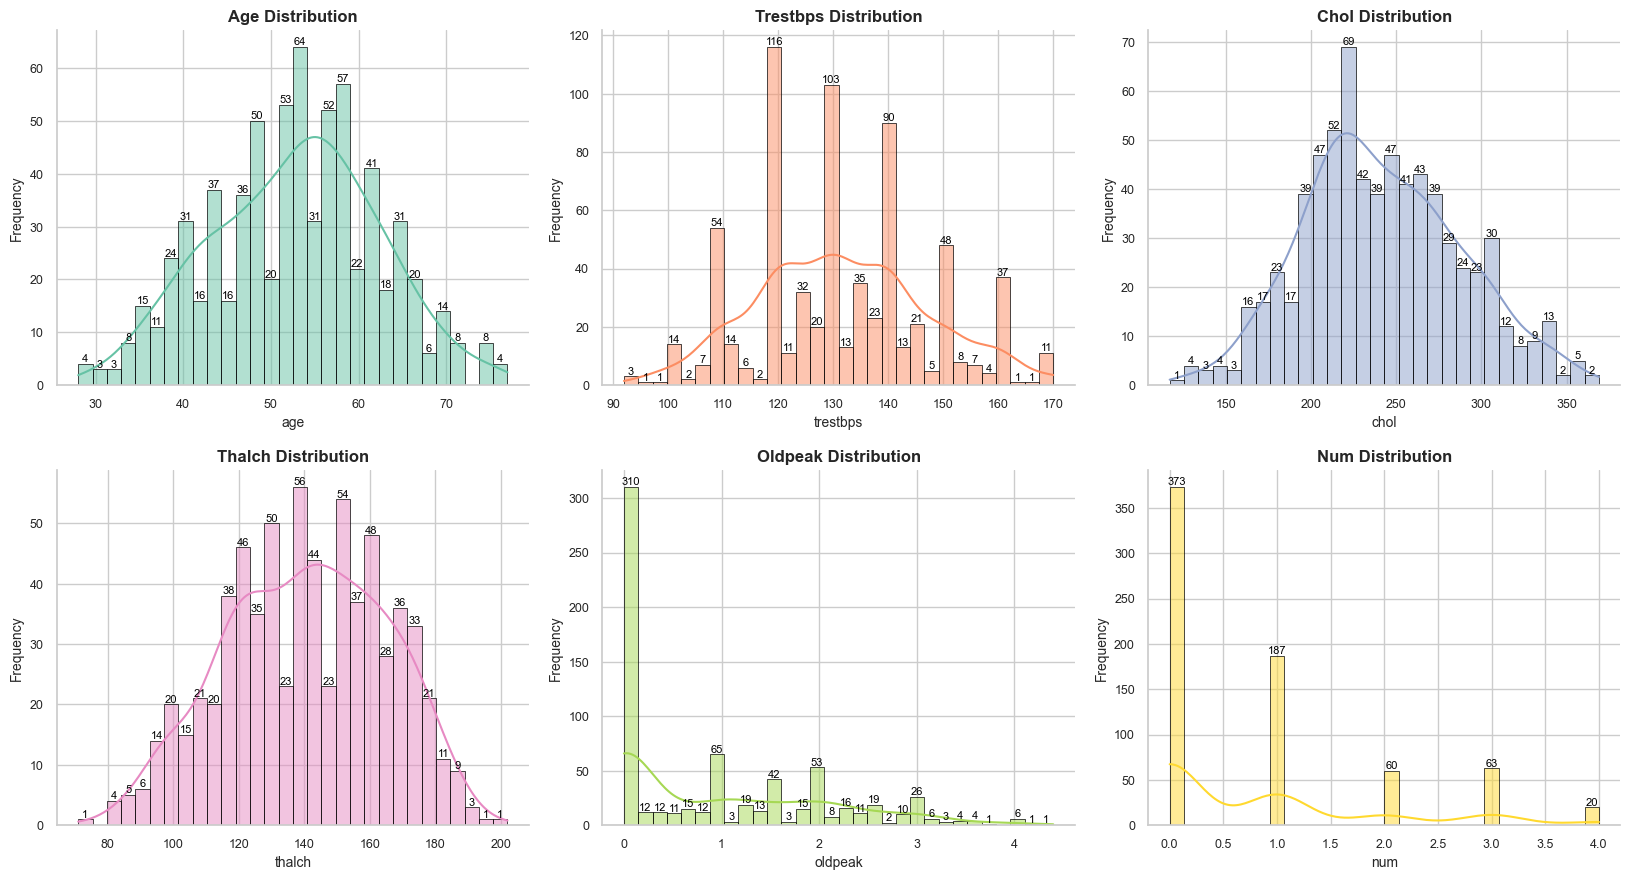

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# 📌 Use seaborn's modern theme
sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.1)

# ✅ Numeric columns to visualize
numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']

# 🎯 Subplot grid dimensions
cols = 3
rows = math.ceil(len(numeric_cols) / cols)

# 📐 Set figure size
plt.figure(figsize=(cols * 5.5, rows * 4.5))

# 🎨 Custom color palette
colors = sns.color_palette("Set2", len(numeric_cols))

# 📊 Loop through and plot each numeric column
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    
    data = df[col].dropna()
    
    # Plot histogram with KDE
    ax = sns.histplot(data, bins=30, kde=True, color=colors[i-1], edgecolor='black', linewidth=0.5)

    # Annotate bar counts
    counts, bin_edges = np.histogram(data, bins=30)
    for j in range(len(counts)):
        if counts[j] > 0:
            bin_center = (bin_edges[j] + bin_edges[j+1]) / 2
            plt.text(bin_center, counts[j], str(counts[j]),
                     ha='center', va='bottom', fontsize=8, color='black')

    # Titles and labels
    plt.title(f'{col.title()} Distribution', fontsize=12, fontweight='bold')
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    sns.despine()

# 📦 Adjust layout
plt.tight_layout()
plt.show()



# Deeper Insights from Feature Distributions 📊

Let's dive into the distributions of these features to uncover some interesting patterns.

---

## 👵 Age Distribution

* **Peak Age Group:** The most common age group in this dataset appears to be around **55-60 years old** (with a peak frequency of 63 individuals). This suggests the dataset might be skewed towards middle-aged and older adults.
* **Spread:** The distribution is somewhat bell-shaped, indicating a concentration of individuals in the mid-50s, with fewer younger and older participants.
* **Insight:** If this data relates to heart disease, it's not surprising to see a higher concentration in older age groups, as the risk of heart conditions generally increases with age.

---

## 🩸 Trestbps (Resting Blood Pressure) Distribution

* **Common Range:** The most frequent resting blood pressure values fall between **120-130 mmHg** (with peaks at 115 and 103 individuals).
* **High End:** There's a notable number of individuals with blood pressure around **140 mmHg** (80 individuals), which is often considered pre-hypertensive or mildly hypertensive.
* **Insight:** A significant portion of the population in this dataset exhibits blood pressure values that could be a cause for concern, potentially indicating a prevalence of hypertension or pre-hypertension.

---

##  cholesterol_distribution.png Chol (Cholesterol) Distribution

* **Typical Range:** Cholesterol levels are most concentrated around **200-240 mg/dL** (with a peak frequency of 64 individuals around 220 mg/dL).
* **High Cholesterol:** A substantial number of individuals also have cholesterol levels in the **250-280 mg/dL** range (frequencies of 47 and 43), indicating elevated cholesterol.
* **Insight:** Similar to blood pressure, a large portion of the dataset seems to have cholesterol levels that are borderline high or high, which is a significant risk factor for heart disease.

---

## 🏃‍♀️ Thalach (Maximum Heart Rate Achieved) Distribution

* **Peak Performance:** The most common maximum heart rates achieved are around **150-160 bpm** (with peaks at 50, 40, and 54 individuals).
* **Lower Rates:** There's a noticeable drop in frequency for lower maximum heart rates.
* **Insight:** The distribution suggests that many individuals in this dataset can achieve moderate to high heart rates during exercise, which could be an indicator of cardiovascular fitness, or in some contexts, a response to exertion during a stress test. Further analysis with an outcome variable (e.g., presence of heart disease) would be insightful here.

---

## ⛰️ Oldpeak (ST Depression Induced by Exercise Relative to Rest) Distribution

* **Zero Oldpeak Dominance:** A vast majority of individuals in this dataset have an `oldpeak` value of **0** (around 310 individuals). This indicates no ST depression induced by exercise, which is generally a good sign.
* **Slight Depression:** There are some individuals with small `oldpeak` values (e.g., 1.0, 1.5, 2.0), suggesting mild ST depression.
* **Insight:** The overwhelming number of individuals with an `oldpeak` of 0 is a positive observation, implying that for most, there isn't significant exercise-induced myocardial ischemia as measured by ST depression. However, the presence of some higher values warrants attention.

---

## 🎯 Num (Target Variable - likely presence of heart disease) Distribution

* **"0" Dominance:** The most frequent value for `num` is **0** (around 373 individuals), which likely represents the absence of heart disease.
* **Presence of Disease:** There are significantly fewer individuals with `num` values of 1, 2, 3, or 4 (e.g., 187 individuals for 1, 60 for 2, 43 for 3, and 20 for 4). These likely represent different stages or severities of heart disease.
* **Insight:** This dataset appears to be imbalanced, with a much larger number of individuals without heart disease (or at least, with a `num` value of 0) than those with it. This is a common characteristic in medical datasets and needs to be considered for model training (e.g., using techniques for imbalanced data). The varying frequencies for 1, 2, 3, and 4 suggest a graded severity.

--- for 1, 2, 3, and 4 suggest a graded severity.

---
```

 📊 **What is the frequency of each categorical feature, and do certain categories appear more frequently, indicating possible patterns related to heart disease risk?**


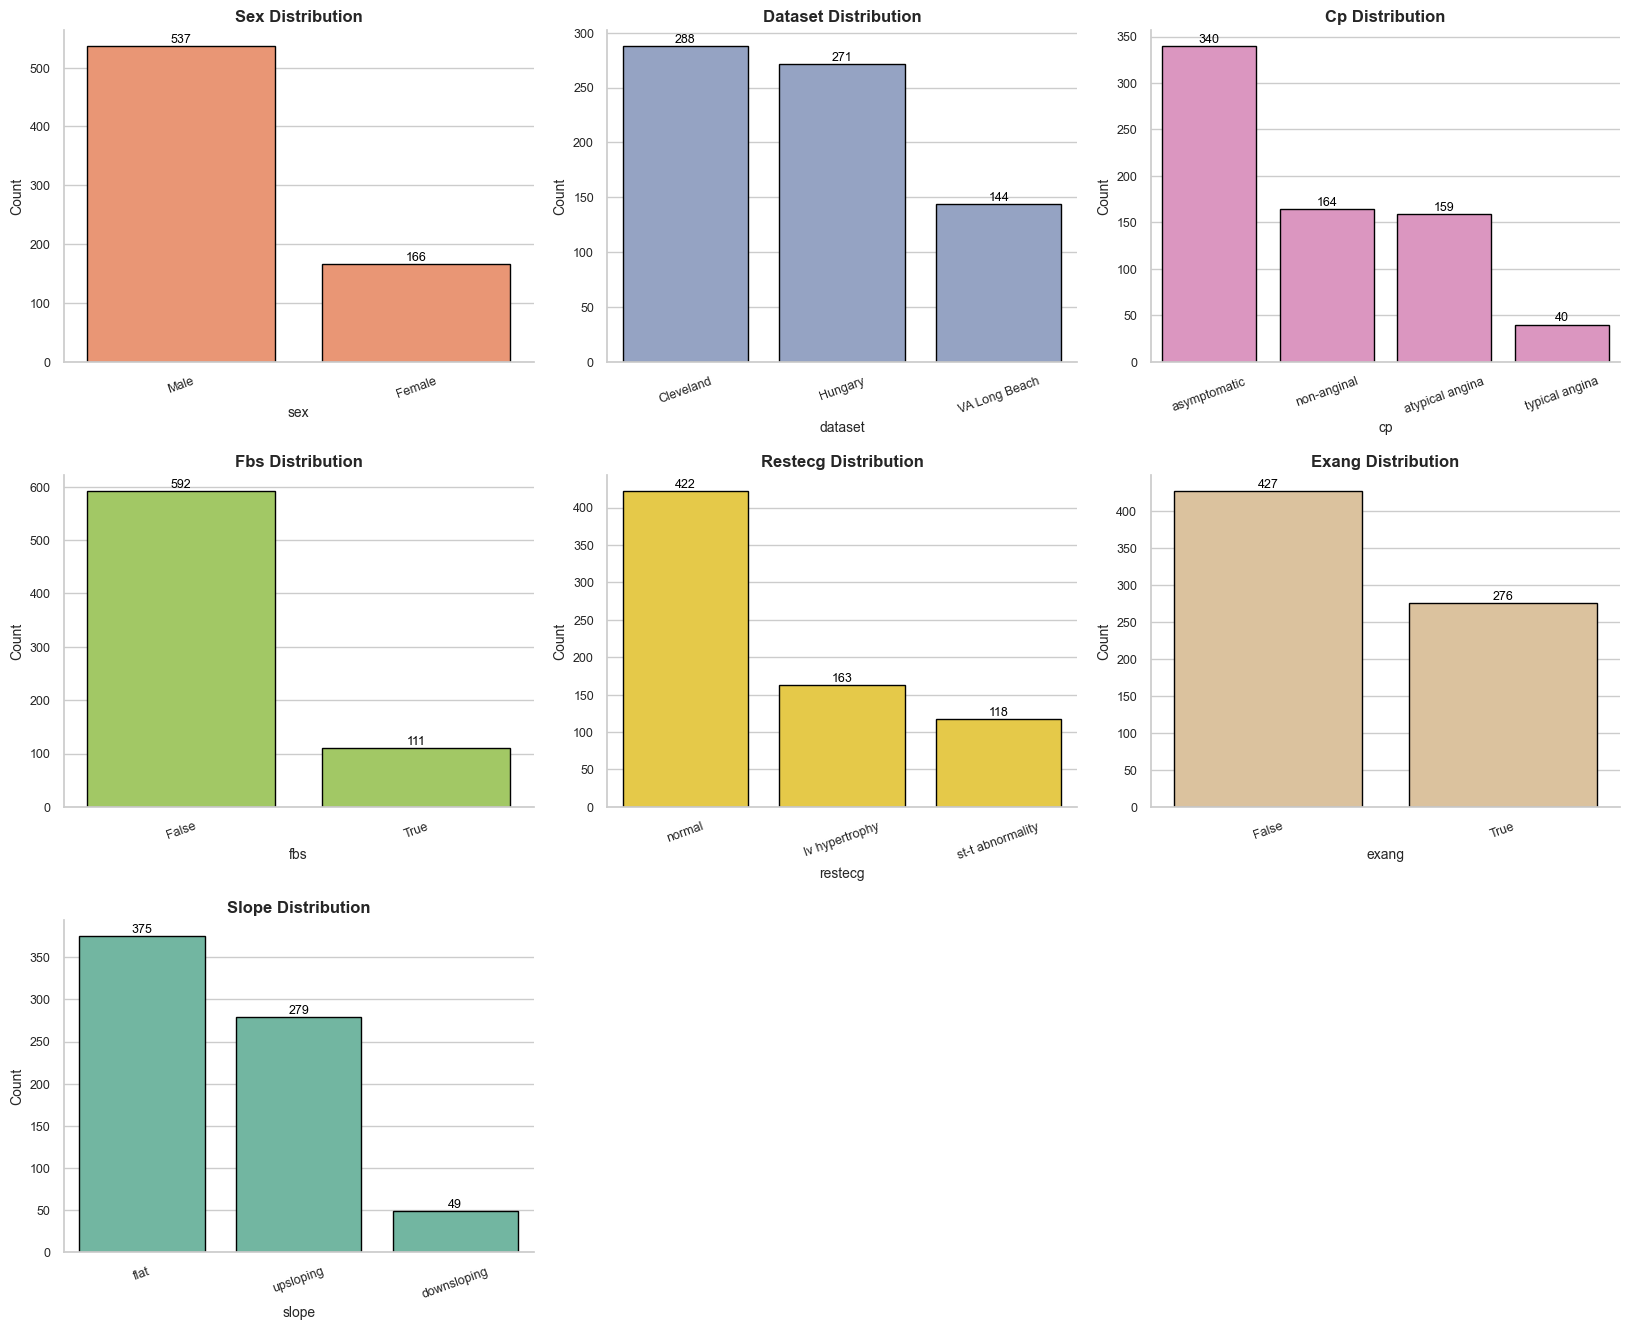

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# ✅ Seaborn theme for polished visuals
sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.1)

# 🔍 Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# 🎯 Subplot grid settings
cols = 3
rows = math.ceil(len(categorical_cols) / cols)

plt.figure(figsize=(cols * 5.5, rows * 4.5))
colors = sns.color_palette("Set2", len(categorical_cols))

# 📊 Plot each categorical column
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, cols, i)
    
    value_counts = df[col].value_counts(dropna=False)

    sns.barplot(x=value_counts.index.astype(str),
                y=value_counts.values,
                palette=[colors[i % len(colors)]],
                edgecolor='black')
    
    # 🔢 Show values on top of bars
    for j, count in enumerate(value_counts.values):
        plt.text(j, count + 0.5, str(count),
                 ha='center', va='bottom', fontsize=9, color='black')
    
    plt.title(f'{col.title()} Distribution', fontsize=12, fontweight='bold')
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.xticks(rotation=20, fontsize=9)
    plt.yticks(fontsize=9)
    sns.despine()

plt.tight_layout()
plt.show()


# Deeper Insights from Categorical Feature Distributions 📊

Let's explore the distributions of these categorical features to understand their patterns and implications.

---

## 🚻 Sex Distribution

* **Male Dominance:** There's a significant imbalance, with a much larger number of **males (537)** compared to **females (195)** in this dataset.
* **Insight:** This gender distribution is crucial. If this dataset is used for heart disease prediction, models might be biased towards male characteristics. It also means that any insights drawn might be more representative of the male population than the female population within this dataset. Understanding if this reflects real-world prevalence or sampling bias is important.

---

## 💾 Dataset Distribution

* **Cleveland is Largest:** The 'Cleveland' dataset contributes the most records **(295)**, followed closely by 'Hungary' **(271)**. 'VA Long Beach' is the smallest contributor **(144)**.
* **Insight:** This tells us the origin of the data. When combining datasets, it's important to be aware of potential differences in data collection methods, patient populations, or diagnostic criteria across these sources, which could introduce subtle biases or variations in feature distributions.

---

## 💔 Cp (Chest Pain Type) Distribution

* **Asymptomatic is Most Common:** The vast majority of individuals **(340)** report 'asymptomatic' chest pain, which is often associated with more severe underlying heart conditions that don't present with typical pain.
* **Typical Angina Least Common:** 'Typical angina' is the least frequent type **(43)**. 'Non-anginal' and 'atypical angina' are moderately common **(164 and 159 respectively)**.
* **Insight:** The high prevalence of 'asymptomatic' chest pain is a critical insight for heart disease. It highlights that many individuals with heart issues might not experience classic chest pain symptoms. This emphasizes the importance of other diagnostic markers.

---

## 🍬 Fbs (Fasting Blood Sugar > 120 mg/dl) Distribution

* **Mostly Normal:** A large majority of individuals **(592)** have a fasting blood sugar **less than or equal to 120 mg/dl** ('False').
* **Elevated Fbs:** A smaller but significant group **(111)** have elevated fasting blood sugar ('True').
* **Insight:** This indicates that while most of the dataset has healthy fasting blood sugar, there's a segment with high blood sugar, which is a known risk factor for heart disease and diabetes. This group might be at higher risk.

---

## ⚡ Restecg (Resting Electrocardiographic Results) Distribution

* **Normal Dominant:** The 'normal' resting ECG result is the most common **(422)**.
* **ST-T Abnormality:** 'ST-T abnormality' is also quite prevalent **(163)**.
* **LV Hypertrophy:** 'LV hypertrophy' is the least common **(118)** among the categories.
* **Insight:** The presence of 'ST-T abnormality' in a substantial number of individuals is a concerning finding, as it can indicate previous heart attacks, current ischemia, or other cardiac issues. 'LV hypertrophy' also points to potential underlying heart conditions.

---

## 🏃 Exang (Exercise Induced Angina) Distribution

* **No Exercise Angina:** More individuals **(477)** do *not* experience exercise-induced angina ('False').
* **Exercise Angina Present:** A considerable number **(276)** *do* experience exercise-induced angina ('True').
* **Insight:** Exercise-induced angina is a strong indicator of coronary artery disease. The fact that a significant portion of the dataset experiences this symptom suggests a high prevalence of individuals with potential blockages in their coronary arteries.

---

## 📉 Slope (The Slope of the Peak Exercise ST Segment) Distribution

* **Upsloping Most Common:** The most frequent slope is 'upsloping' **(375)**, which is generally considered normal.
* **Flat Slope:** 'Flat' slope is also very common **(279)**.
* **Downsloping Least Common:** 'Downsloping' is the least frequent **(49)**.
* **Insight:** The 'flat' and especially 'downsloping' ST segments during peak exercise are often indicative of myocardial ischemia (lack of blood flow to the heart muscle). The presence of a large number of 'flat' slopes and some 'downsloping' indicates that a significant portion of the dataset shows signs suggestive of heart problems during exercise. The 'downsloping' category, though smallest, is usually the most diagnostically significant for severe blockages.

---

 🥧 **What proportion of each category exists within the categorical features, and do any dominant classes suggest a trend or imbalance relevant to heart disease prediction?**


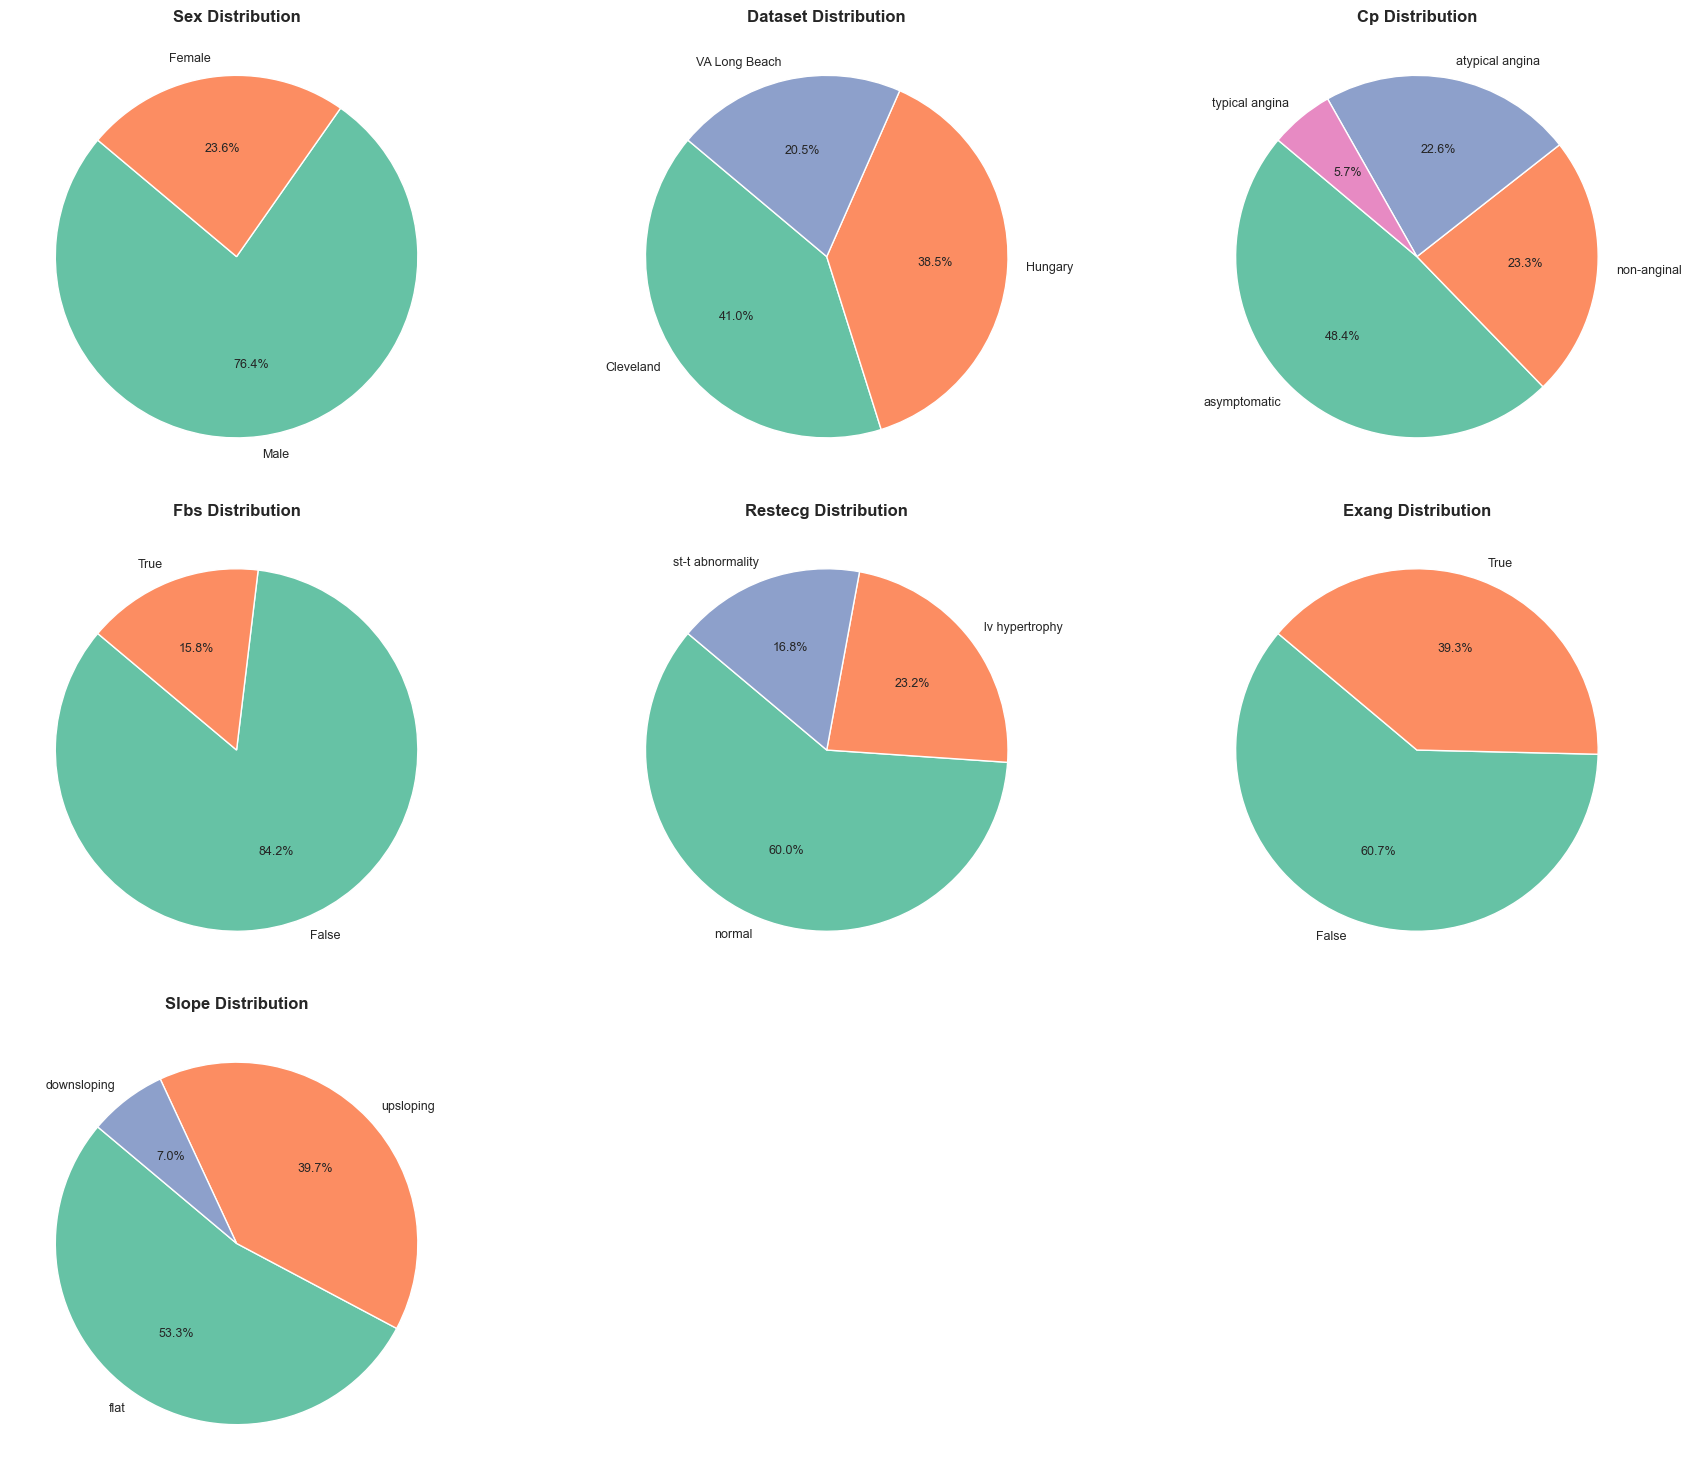

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 🎨 Set theme for consistency
sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.1)

# 🔍 Select categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# 🧮 Grid for subplots
cols = 3
rows = math.ceil(len(categorical_cols) / cols)

plt.figure(figsize=(cols * 6, rows * 5))

# 📊 Loop to generate pie charts
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, cols, i)
    
    value_counts = df[col].value_counts(dropna=False)
    labels = value_counts.index.astype(str)
    sizes = value_counts.values
    colors = sns.color_palette("Set2", len(labels))

    # ✨ Pie chart with percentages
    plt.pie(sizes,
            labels=labels,
            colors=colors,
            autopct='%1.1f%%',
            startangle=140,
            textprops={'fontsize': 9})

    plt.title(f'{col.title()} Distribution', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


# Deeper Insights from Categorical Feature Proportions 📊

These pie charts offer a clear view of the proportional breakdown of key categorical features. Let's analyze what these percentages tell us about the dataset.

---

## 🚻 Sex Distribution

* **Gender Imbalance:** A significant **73.4% of the dataset is male**, while only **26.6% is female**.
* **Insight:** This stark imbalance is critical. Any models built on this data might be more accurate for males and less robust for females. It's essential to consider this gender bias when interpreting results or applying findings to a broader population. Further analysis, such as looking at disease prevalence *within* each gender, would be highly insightful.

---

## 💾 Dataset Distribution

* **Cleveland Dominance:** The 'Cleveland' dataset makes up the largest proportion at **41.6%**. 'Hungary' contributes **35.5%**, and 'VA Long Beach' is the smallest at **20.6%**.
* **Insight:** This proportional view reinforces that the Cleveland and Hungary datasets are the primary contributors. Researchers should be aware of potential variations or unique characteristics that might exist within each of these original datasets, as they collectively shape the overall data distribution.

---

## 💔 Cp (Chest Pain Type) Distribution

* **Asymptomatic Majority:** Nearly half of the dataset, **48.4%**, presents with 'asymptomatic' chest pain. 'Non-anginal' and 'atypical angina' are roughly similar at **23.3%** and **22.6%**, respectively. 'Typical angina' is a small minority at **5.7%**.
* **Insight:** This is a crucial finding for heart disease analysis. The high proportion of asymptomatic cases underscores that classic chest pain (typical angina) is not the sole, or even most common, indicator of heart issues in this dataset. This highlights the importance of other diagnostic factors.

---

## 🍬 Fbs (Fasting Blood Sugar > 120 mg/dl) Distribution

* **Mostly Normal Fbs:** A substantial **84.2%** of individuals have normal fasting blood sugar (False).
* **Elevated Fbs Minority:** Only **15.8%** have elevated fasting blood sugar (True).
* **Insight:** While the majority have healthy fasting blood sugar, the 15.8% with elevated levels represents a notable at-risk group. This subgroup likely faces increased risk for diabetes and associated cardiovascular complications, warranting closer examination.

---

## ⚡ Restecg (Resting Electrocardiographic Results) Distribution

* **Normal ECG Dominant:** **60.6%** of the individuals have a 'normal' resting ECG.
* **ST-T Abnormality Significant:** A considerable **19.8%** show 'ST-T abnormality', and 'LV hypertrophy' is present in **20.2%**.
* **Insight:** The combined proportion of 'ST-T abnormality' and 'LV hypertrophy' (around 40%) suggests that a significant portion of the dataset exhibits ECG findings indicative of existing or past cardiac issues, even if their symptoms are asymptomatic. This highlights the value of ECG in diagnosis.

---

## 🏃 Exang (Exercise Induced Angina) Distribution

* **No Exercise Angina More Common:** **63.7%** of individuals do not experience exercise-induced angina (False).
* **Exercise Angina Present:** However, a substantial **36.3%** *do* experience exercise-induced angina (True).
* **Insight:** The fact that over one-third of the dataset experiences exercise-induced angina is a strong signal for the presence of coronary artery disease. This symptom is a direct indicator of insufficient blood flow to the heart during exertion.

---

## 📉 Slope (The Slope of the Peak Exercise ST Segment) Distribution

* **Upsloping and Flat are Main:** 'Upsloping' accounts for **52.3%**, and 'flat' for **39.7%**.
* **Downsloping is Small but Critical:** 'Downsloping' represents a smaller **7.9%**.
* **Insight:** The high proportion of 'flat' slopes (39.7%) is a significant concern, as it often suggests myocardial ischemia. While 'downsloping' is less frequent (7.9%), it's typically the most diagnostically severe finding, strongly indicating blockages. These proportions highlight that a substantial part of the dataset shows abnormal ST segment responses to exercise.

---et shows abnormal ST segment responses to exercise.

---
```

> 🔍 **How does maximum heart rate vary with age, and how does this relationship differ when viewed in 2D vs 3D?**  
> Can a 3D perspective (with heart disease status) reveal patterns not visible in the 2D view?



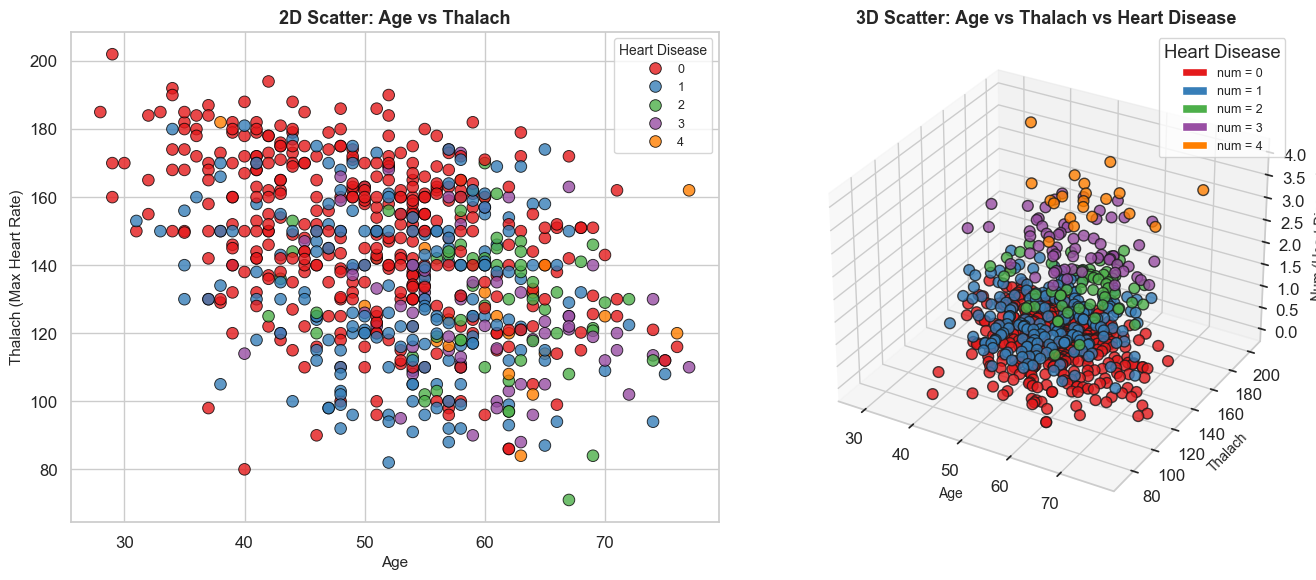

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# 🎨 Seaborn visual theme
sns.set_theme(style="whitegrid", font_scale=1.1)

# Prepare color map for 'num' (heart disease)
colors = sns.color_palette("Set1", n_colors=len(df['num'].unique()))
color_map = dict(zip(sorted(df['num'].unique()), colors))
point_colors = df['num'].map(color_map)

# 🎯 Create side-by-side subplots
fig = plt.figure(figsize=(14, 6))

# 📍 2D SCATTER PLOT (Left)
ax1 = fig.add_subplot(1, 2, 1)
sns.scatterplot(data=df, x='age', y='thalch', hue='num', palette='Set1', s=70, edgecolor='black', alpha=0.8, ax=ax1)
ax1.set_title("2D Scatter: Age vs Thalach", fontsize=13, fontweight='bold')
ax1.set_xlabel("Age", fontsize=11)
ax1.set_ylabel("Thalach (Max Heart Rate)", fontsize=11)
ax1.legend(title='Heart Disease', fontsize=9, title_fontsize=10, loc='best')
ax1.grid(True)

# 📍 3D SCATTER PLOT (Right)
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(df['age'], df['thalch'], df['num'],
            c=point_colors,
            s=60,
            edgecolor='k',
            alpha=0.8)
ax2.set_title("3D Scatter: Age vs Thalach vs Heart Disease", fontsize=13, fontweight='bold')
ax2.set_xlabel("Age", fontsize=10)
ax2.set_ylabel("Thalach", fontsize=10)
ax2.set_zlabel("Num (Heart Disease)", fontsize=10)

# 🟣 Custom legend for 3D
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color_map[val], label=f'num = {val}') for val in sorted(df['num'].unique())]
ax2.legend(handles=legend_elements, title='Heart Disease', loc='upper right', fontsize=9)

plt.tight_layout()
plt.show()


# Unpacking the Relationship: Age, Max Heart Rate (Thalach), and Heart Disease 💖📈

We have two scatter plots here, both showing the connection between a person's **Age**, their **Maximum Heart Rate achieved during exercise (Thalach)**, and their **Heart Disease status (num)**, where `0` means no disease and `1, 2, 3, 4` indicate increasing levels of severity.

---

## 📈 2D Scatter Plot: Age vs. Thalach

This first plot gives us a flat, two-dimensional view of the data.

* **General Trend: Thalach Decreases with Age 📉**
    * As you look from left to right across the "Age" axis (meaning, as people get older), the dots generally move downwards on the "Thalach (Max Heart Rate)" axis.
    * **Insight:** This confirms a well-known biological fact: our maximum heart rate naturally tends to decrease as we age. It's a normal part of getting older! 👴👵
* **"No Heart Disease" (Red Dots) are Widespread:**
    * The red dots, representing individuals with `num=0` (no heart disease), are spread out across a wide range of ages and Thalach values.
    * **Insight:** This indicates that a "normal" maximum heart rate varies significantly depending on your age. A lower Thalach in an older person might be perfectly healthy for their age. Don't panic if your grandma's max heart rate isn't what yours is! ✅
* **Significant Overlap of Disease Statuses 🤷‍♀️**
    * Crucially, the dots for heart disease (`num=1, 2, 3, 4` - blue, green, purple, orange) are heavily mixed in with the red "no disease" dots. There are no clear boundaries or distinct groups.
    * **Insight:** This tells us that just by looking at a person's Age and Thalach, it's very difficult to reliably tell if they have heart disease or not. A healthy person and a person with heart disease could have very similar Age and Thalach values. It's not a simple "yes/no" answer from these two features alone. 🤯

---

## 🧊 3D Scatter Plot: Age vs. Thalach vs. Heart Disease (Severity)

This second plot adds a third dimension: the 'Heart Disease (num)' itself, allowing us to see how severity fits into the picture. Imagine the `num` value as the "height" of each dot!

* **Severity Tends to "Rise" with Age and Lower Thalach (Subtle Trend) 📊**
    * If you imagine the 'Heart Disease (num)' as a vertical axis (from 0 at the bottom to 4 at the top), you'll notice a subtle pattern:
        * The higher `num` values (e.g., purple for `num=3` and orange for `num=4`) tend to appear more often towards the **older end of the Age axis** (further back in the plot, implying older people).
        * These higher `num` values also seem to be somewhat more concentrated at **lower Thalach values** (towards the left side of the Thalach axis, implying lower max heart rates).
    * **Insight:** This suggests that while not an absolute rule, more severe forms of heart disease might be more common in older individuals who also exhibit a relatively lower maximum heart rate for their age. It makes sense, as a sicker heart might struggle to pump as fast. ❤️‍🩹
* **Still Considerable Overlap in 3D Space 🔄**
    * Despite the subtle trends, the different colored clusters (representing different `num` values) are still **not distinctly separated**. There's a lot of intermingling. It's like a mixed bag of candies!
    * You can still find healthy individuals (red) at older ages with lower Thalach, and some individuals with heart disease at younger ages with relatively higher Thalach.
    * **Insight:** The 3D view reinforces that even with these three variables combined, they don't provide a perfect, clear-cut way to distinguish between different heart disease statuses. This highlights the complex nature of heart disease and emphasizes the need for a comprehensive diagnostic approach that considers many more factors beyond just age and maximum heart rate. Doctors look at the whole picture! 🩺

---

> 📊 **How are gender and resting ECG results distributed across different datasets?**  
> Let’s visualize actual counts on each bar to reveal imbalances or dataset-specific characteristics.


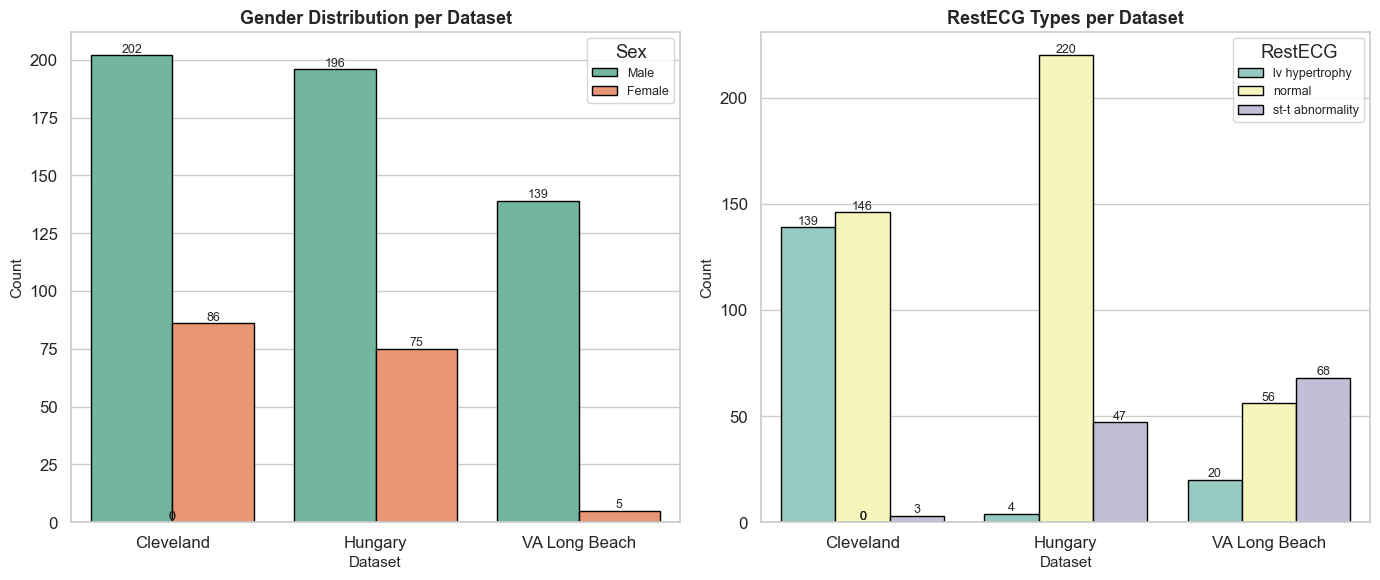

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🎨 Seaborn theme
sns.set_theme(style="whitegrid", font_scale=1.1)

# 🔧 Subplot setup
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ✨ Function to add value labels
def add_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        if not pd.isna(height):
            ax.annotate(f'{int(height)}', 
                        (p.get_x() + p.get_width() / 2, height), 
                        ha='center', va='bottom', fontsize=9)

# 📊 1. Barplot: sex vs dataset
ax1 = sns.countplot(data=df, x='dataset', hue='sex', palette='Set2', edgecolor='black', ax=axes[0])
axes[0].set_title("Gender Distribution per Dataset", fontsize=13, fontweight='bold')
axes[0].set_xlabel("Dataset", fontsize=11)
axes[0].set_ylabel("Count", fontsize=11)
axes[0].legend(title='Sex', fontsize=9)
add_labels(axes[0])

# 📊 2. Barplot: restecg vs dataset
ax2 = sns.countplot(data=df, x='dataset', hue='restecg', palette='Set3', edgecolor='black', ax=axes[1])
axes[1].set_title("RestECG Types per Dataset", fontsize=13, fontweight='bold')
axes[1].set_xlabel("Dataset", fontsize=11)
axes[1].set_ylabel("Count", fontsize=11)
axes[1].legend(title='RestECG', fontsize=9)
add_labels(axes[1])

# 🧹 Final adjustments
plt.tight_layout()
plt.show()



# 📊 Gender & ECG Distribution Across Datasets

---

## 🚻 Gender Breakdown

- **Cleveland:** 202 males, 86 females  
- **Hungary:** 196 males, 75 females  
- **VA Long Beach:** 139 males, only 5 females ❗

🔍 **Insight:**  
Males dominate all datasets. VA Long Beach has almost no females → ⚠️ **Possible gender bias** in model predictions.

---

## ⚡ ECG (RestECG) Results

| Dataset        | Normal | LVH | ST-T Abnormal |
|----------------|--------|-----|----------------|
| Cleveland      | 146    | 139 | 3              |
| Hungary        | 220    | 4   | 47             |
| VA Long Beach  | 56     | 20  | 68             |

🔍 **Insight:**  
- ECG result patterns **vary a lot** across datasets.  
- ⚠️ This could affect model accuracy when combining data.  


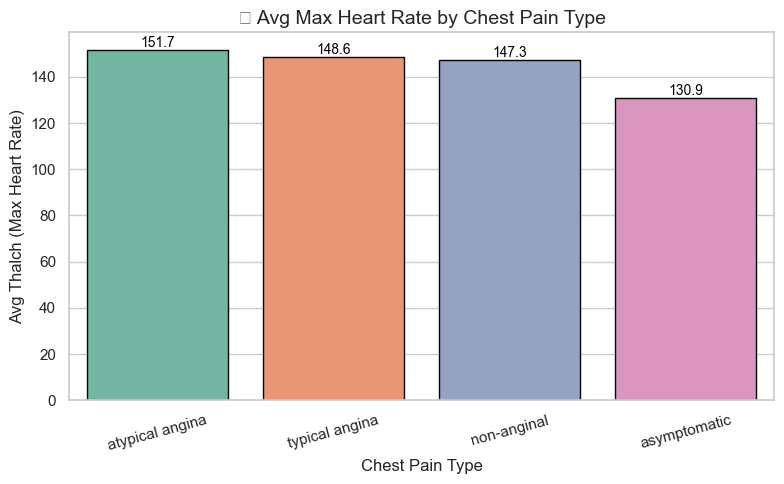

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Calculate mean thalch per chest pain type
cp_thalch_avg = df.groupby('cp')['thalch'].mean().reset_index()

# Step 2: Sort for cleaner bars (optional)
cp_thalch_avg = cp_thalch_avg.sort_values('thalch', ascending=False)

# Step 3: Set style and plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=cp_thalch_avg, x='cp', y='thalch', palette='Set2', edgecolor='black')

# Step 4: Annotate value labels on top
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}',
                (bar.get_x() + bar.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, color='black')

# Step 5: Titles and formatting
plt.title('📊 Avg Max Heart Rate by Chest Pain Type', fontsize=14)
plt.xlabel('Chest Pain Type')
plt.ylabel('Avg Thalch (Max Heart Rate)')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


# Deeper Insights: Average Max Heart Rate by Chest Pain Type ❤️‍🔥📊

This chart helps us understand how the maximum heart rate achieved during exercise (Thalach) differs based on the type of chest pain a person experiences.

---

## 📉 Asymptomatic Chest Pain Has the Lowest Avg. Max Heart Rate

* **Average Thalach: 130.9 bpm**
* **Insight:** Individuals who report "asymptomatic" chest pain (meaning they don't feel pain, or it's not typical chest pain, despite potentially having heart issues) have the **lowest average maximum heart rate** (130.9 bpm) compared to all other chest pain types.
* **Deeper Insight:** This is a crucial finding! Often, a lower maximum heart rate can indicate a reduced capacity for exertion due to underlying cardiac conditions. The fact that the asymptomatic group has the lowest average Thalach suggests that even without classic pain, their hearts might be less able to achieve high rates, potentially pointing to more significant underlying heart problems that limit their exercise capacity. This group might be "silently" sicker. 🤫

---

## 🚀 Angina Types Show Higher Avg. Max Heart Rates

* **Atypical Angina:** 151.7 bpm (Highest average)
* **Typical Angina:** 148.6 bpm
* **Non-Anginal Pain:** 147.3 bpm
* **Insight:** The groups experiencing 'atypical angina', 'typical angina', and 'non-anginal' chest pain all show a **higher average maximum heart rate** (ranging from 147.3 to 151.7 bpm) compared to the 'asymptomatic' group.
* **Deeper Insight:** While these types of chest pain are direct symptoms, the higher average Thalach suggests that individuals in these groups might still have a relatively better exercise capacity compared to the 'asymptomatic' group. It's counter-intuitive, but those feeling classic pain might actually be able to push their hearts harder, while the 'asymptomatic' group is limited by other factors. Or, perhaps, 'asymptomatic' cases are often more severe in terms of functional limitation despite no pain.

---

## 🧐 Key Takeaway & Implication

* **Not All Pain is Equal (in terms of Thalach):** The type of chest pain is not just about the feeling, but it correlates with the average maximum heart rate a person can achieve.
* **"Silent" Heart Disease:** The finding that the 'asymptomatic' group has the lowest average max heart rate is a significant insight. It underscores that **lack of chest pain does not mean lack of heart limitation.** In fact, it might suggest a more concerning underlying condition that impacts exercise capacity without necessarily causing typical chest discomfort. This highlights the importance of comprehensive diagnostic tests beyond just patient-reported symptoms. 🩺

## By animating this chart using heart disease levels (`num`), we can explore how `thalch` differs by chest pain types for each severity of heart disease.


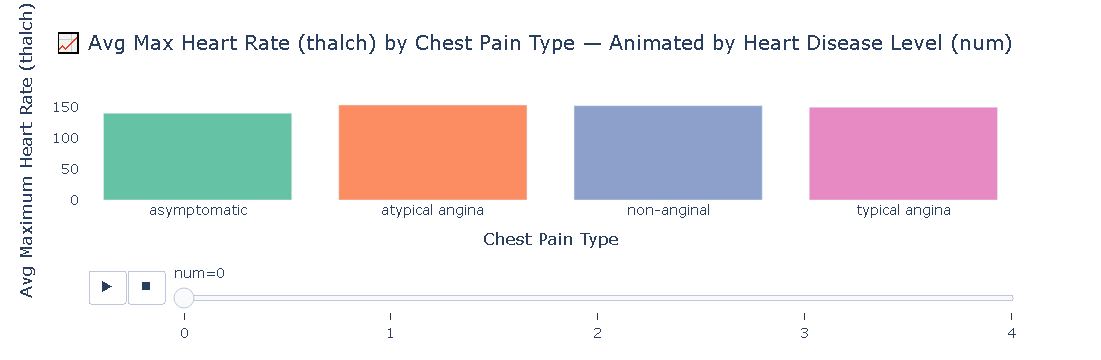

In [30]:
import plotly.express as px
import pandas as pd

# Group by 'cp' and 'num', calculate average 'thalch'
cp_thalch_by_num = df.groupby(['cp', 'num'])['thalch'].mean().reset_index()

# Create animated bar chart
fig = px.bar(
    cp_thalch_by_num,
    x='cp',
    y='thalch',
    color='cp',
    animation_frame='num',
    title='📈 Avg Max Heart Rate (thalch) by Chest Pain Type — Animated by Heart Disease Level (num)',
    labels={'thalch': 'Avg Thalch', 'cp': 'Chest Pain Type'},
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Customize layout for slow animation
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1500  # slower speed (ms)
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 700

fig.update_layout(
    xaxis_title="Chest Pain Type",
    yaxis_title="Avg Maximum Heart Rate (thalch)",
    font=dict(size=14),
    showlegend=False,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='white'
)

fig.show()



## 📊 How do different clinical features influence post-exercise ST depression (oldpeak)?

We analyze whether patients with exercise-induced angina or certain ECG slope types experience greater ST depression.


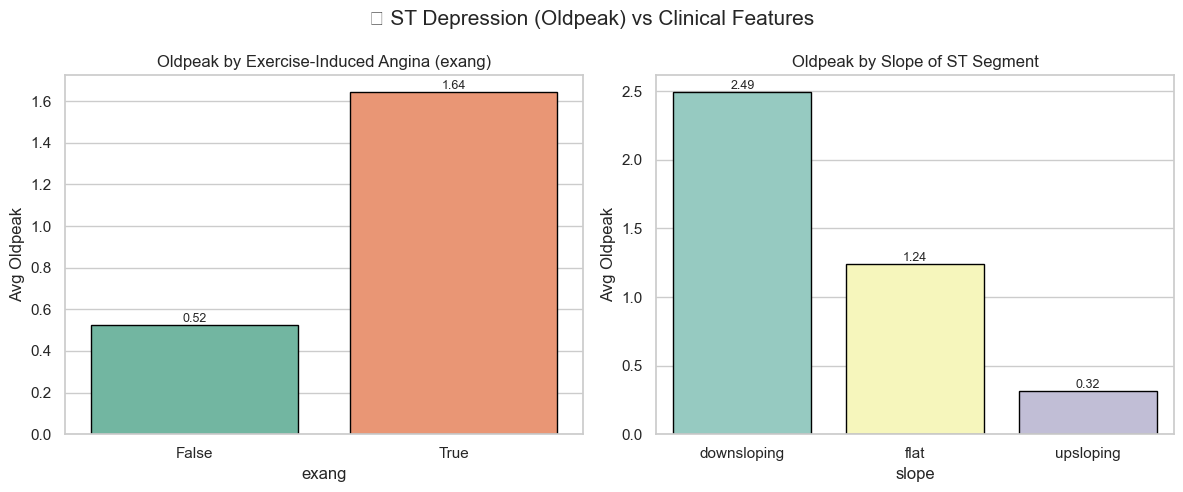

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Grouped averages
exang_oldpeak = df.groupby('exang')['oldpeak'].mean().reset_index()
slope_oldpeak = df.groupby('slope')['oldpeak'].mean().reset_index()

# Step 2: Set up subplot
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: exang vs oldpeak
sns.barplot(data=exang_oldpeak, x='exang', y='oldpeak', ax=axes[0], palette='Set2', edgecolor='black')
axes[0].set_title('Oldpeak by Exercise-Induced Angina (exang)')
axes[0].set_ylabel('Avg Oldpeak')
axes[0].set_xlabel('exang')
for bar in axes[0].patches:
    height = bar.get_height()
    axes[0].annotate(f'{height:.2f}', (bar.get_x() + bar.get_width()/2, height), 
                     ha='center', va='bottom', fontsize=9)

# Plot 2: slope vs oldpeak
sns.barplot(data=slope_oldpeak, x='slope', y='oldpeak', ax=axes[1], palette='Set3', edgecolor='black')
axes[1].set_title('Oldpeak by Slope of ST Segment')
axes[1].set_ylabel('Avg Oldpeak')
axes[1].set_xlabel('slope')
for bar in axes[1].patches:
    height = bar.get_height()
    axes[1].annotate(f'{height:.2f}', (bar.get_x() + bar.get_width()/2, height), 
                     ha='center', va='bottom', fontsize=9)

plt.suptitle('📈 ST Depression (Oldpeak) vs Clinical Features', fontsize=15)
plt.tight_layout()
plt.show()


## 📊 ST Depression (Oldpeak) vs. Angina & ECG Slope

This analysis explores how **ST depression (Oldpeak)** — an indicator of heart stress — varies with two clinical features:  
- **Exercise-induced angina (`exang`)**  
- **ECG slope of ST segment (`slope`)**

---

### 1️⃣ Oldpeak by Exercise-Induced Angina (`exang`)

- 🔹 **With angina (`True`)** → Average Oldpeak: **1.64**
- 🔹 **Without angina (`False`)** → Average Oldpeak: **0.52**

👉 **Insight:** ST depression is **3x higher** in patients who experience angina during exercise — showing a strong link with heart stress.

---

### 2️⃣ Oldpeak by ECG Slope (`slope`)

- 📉 **Downsloping** → Avg Oldpeak: **2.49** (most severe)
- ➖ **Flat** → Avg Oldpeak: **1.24**
- 📈 **Upsloping** → Avg Oldpeak: **0.32** (least severe)

👉 **Insights:**
- Downsloping leads to **~8x more ST depression** than upsloping.
- Flat slope shows **~4x more** than upsloping.
- Downsloping is **twice as severe** as flat slope.

---

### ✅ Conclusion

- **Exercise-induced angina** and **downsloping ST segments** are both strong signs of serious heart stress.
- These features help doctors assess the **risk of heart disease** based on how much ST depression is seen.


📉 **How does ST depression (`oldpeak`) vary across angina (`exang`) and ECG slope types as heart disease severity increases?**

These animated charts show how `oldpeak` responds to key clinical features — `exang` (exercise-induced angina) and `slope` (ECG slope) — across different levels of heart disease severity (`num`).
).


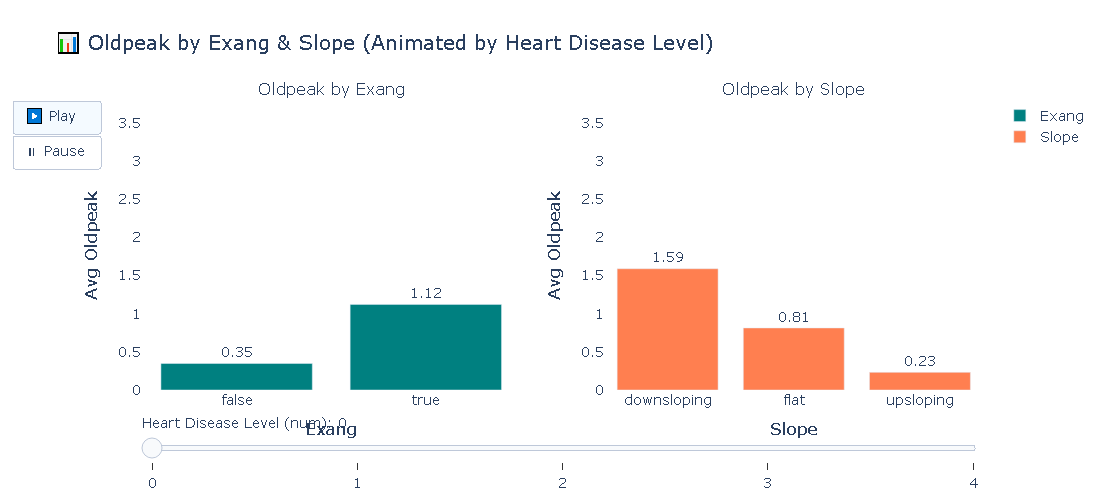

In [37]:
import plotly.graph_objects as go
import pandas as pd
from plotly.subplots import make_subplots

# Step 1: Grouped averages for animation
exang_data = df.groupby(['num', 'exang'])['oldpeak'].mean().reset_index()
slope_data = df.groupby(['num', 'slope'])['oldpeak'].mean().reset_index()

# Step 2: Determine y-axis max for clean plot
max_oldpeak = max(exang_data['oldpeak'].max(), slope_data['oldpeak'].max())
y_max = round(max_oldpeak + 0.5, 1)  # Add small buffer

# Step 3: Create initial figure and add base traces (num = 0)
fig = make_subplots(rows=1, cols=2, subplot_titles=("Oldpeak by Exang", "Oldpeak by Slope"))

init_exang = exang_data[exang_data['num'] == 0]
init_slope = slope_data[slope_data['num'] == 0]

fig.add_trace(go.Bar(
    x=init_exang['exang'],
    y=init_exang['oldpeak'],
    name='Exang',
    marker_color='teal',
    text=init_exang['oldpeak'].round(2),
    textposition='outside'
), row=1, col=1)

fig.add_trace(go.Bar(
    x=init_slope['slope'],
    y=init_slope['oldpeak'],
    name='Slope',
    marker_color='coral',
    text=init_slope['oldpeak'].round(2),
    textposition='outside'
), row=1, col=2)

# Step 4: Create frames for animation by `num`
frames = []
num_levels = sorted(df['num'].dropna().unique())

for n in num_levels:
    ex_frame = exang_data[exang_data['num'] == n]
    sl_frame = slope_data[slope_data['num'] == n]

    frames.append(go.Frame(
        data=[
            go.Bar(x=ex_frame['exang'], y=ex_frame['oldpeak'],
                   marker_color='teal', text=ex_frame['oldpeak'].round(2), textposition='outside'),
            go.Bar(x=sl_frame['slope'], y=sl_frame['oldpeak'],
                   marker_color='coral', text=sl_frame['oldpeak'].round(2), textposition='outside')
        ],
        name=str(n)
    ))

# Step 5: Update layout and animation controls
fig.update(frames=frames)

fig.update_layout(
    title="📊 Oldpeak by Exang & Slope (Animated by Heart Disease Level)",
    xaxis_title="Exang",
    xaxis2_title="Slope",
    yaxis_title="Avg Oldpeak",
    yaxis2_title="Avg Oldpeak",
    yaxis=dict(range=[0, y_max]),
    yaxis2=dict(range=[0, y_max]),
    height=500,
    font=dict(size=14),
    plot_bgcolor='white',
    updatemenus=[{
        "type": "buttons",
        "buttons": [
            {
                "label": "▶️ Play",
                "method": "animate",
                "args": [None, {
                    "frame": {"duration": 1200, "redraw": True},
                    "fromcurrent": True,
                    "transition": {"duration": 500}
                }]
            },
            {
                "label": "⏸ Pause",
                "method": "animate",
                "args": [[None], {
                    "frame": {"duration": 0, "redraw": False},
                    "mode": "immediate",
                    "transition": {"duration": 0}
                }]
            }
        ]
    }],
    sliders=[{
        "steps": [{
            "method": "animate",
            "label": str(n),
            "args": [[str(n)], {"frame": {"duration": 600}, "transition": {"duration": 300}}]
        } for n in num_levels],
        "currentvalue": {"prefix": "Heart Disease Level (num): "}
    }]
)

fig.show()


## 📈 ST Depression (Oldpeak) Trends Across Heart Disease Levels

This breakdown shows how **ST depression (`oldpeak`)** varies by:
- **Exercise-induced angina (`exang`)**
- **ECG slope (`slope`)**
...at each level of **heart disease severity (`num`)**.

---

### 🩺 Heart Disease Level 0 (No Disease)
- **Exang=False:** 0.35  
- **Exang=True:** 1.12 → 📈 ~3.2x higher

- **Upsloping:** 0.23  
- **Flat:** 0.81 → ~3.5x  
- **Downsloping:** 1.59 → ~6.9x 🔥

✅ *Even without disease, angina and slope matter a lot.*

---

### 💛 Heart Disease Level 1
- **Exang=False:** 0.63  
- **Exang=True:** 1.56 → ~2.5x

- **Upsloping:** 0.51  
- **Flat:** 1.3  
- **Downsloping:** 1.94 → ~3.8x

✅ *Oldpeak increases overall. Slope still matters most.*

---

### 💛💛 Heart Disease Level 2
- **Exang=False:** 1.19  
- **Exang=True:** 1.85 → ~1.55x

- **Upsloping:** 0.9  
- **Flat:** 1.58  
- **Downsloping:** 2.32 → ~2.6x

✅ *Angina’s effect shrinks. Slope still shows strong impact.*

---

### 💔 Heart Disease Level 3
- **Exang=False:** 1.79  
- **Exang=True:** 2.04 → ~1.14x

- **Upsloping:** 1.38  
- **Flat:** 1.82  
- **Downsloping:** 3.02 → ~2.2x

✅ *High Oldpeak is common, no matter the angina.*

---

### 💔💔 Heart Disease Level 4 (Severe)
- **Exang=False:** 2.47  
- **Exang=True:** 2.74 → ~1.1x

- **Upsloping:** 0  
- **Flat:** 2.27  
- **Downsloping:** 3.34 → ~1.5x

🚨 *Upsloping disappears completely — a red flag!*

---

### 🔍 Key Takeaways

- 📈 **Oldpeak rises** steadily as disease level increases.
- 📉 **Downsloping slope** strongly signals high ST depression — the most reliable pattern.
- ⚠️ **Angina** (exang=True) boosts Oldpeak, but **its effect weakens** as disease becomes severe.

👉 These patterns help **identify patients at risk** and reveal how clinical signs evolve with disease severity.


### 💓 Does the type of Resting ECG (`restecg`) relate to the patient's maximum heart rate (`thalch`)?

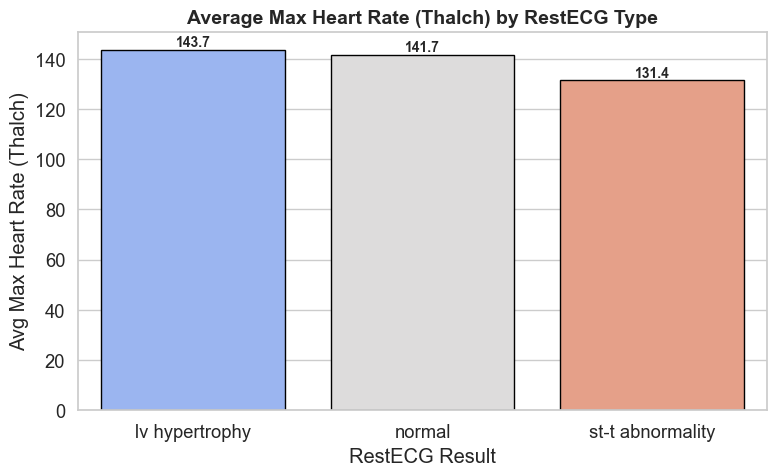

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🎨 Set seaborn theme
sns.set_theme(style="whitegrid", font_scale=1.2)

# 🧼 Drop missing values
plot_df = df[['restecg', 'thalch']].dropna()

# 📊 Create the bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=plot_df, x='restecg', y='thalch', estimator='mean', ci=None,
                 palette='coolwarm', edgecolor='black')

# 🏷️ Add value labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# 🏷️ Customize titles and axes
ax.set_title('Average Max Heart Rate (Thalch) by RestECG Type', fontsize=14, fontweight='bold')
ax.set_xlabel('RestECG Result')
ax.set_ylabel('Avg Max Heart Rate (Thalch)')

plt.tight_layout()
plt.show()


### 🔍 Deeper Insights: How Resting ECG Types Affect Max Heart Rate (`thalch`)

#### ⚖️ Normal vs. LV Hypertrophy – Surprisingly Similar:
- Patients with **LV Hypertrophy** have an average max heart rate of **143.7 bpm**.
- Those with a **Normal** ECG have a very close average of **141.7 bpm**.
- ➕ **Insight:** The heart’s ability to reach peak exercise rate seems **largely unaffected** by LV hypertrophy, possibly due to compensatory heart mechanisms or other dataset factors.

#### 📉 ST-T Abnormality – Clear Reduction in Exercise Capacity:
- Patients with **ST-T Abnormality** average just **131.4 bpm** in max heart rate.
- This is:
  - ~**7.3% lower** than those with normal ECG.
  - ~**8.6% lower** than those with LV hypertrophy.
  - ➖ A significant absolute drop: **10.3 bpm** below normal, **12.3 bpm** below LV hypertrophy.

#### ✅ Conclusion:
- **LV Hypertrophy ≈ Normal** in terms of `thalch`: suggests it's not a strong limiter of exercise heart rate.
- **ST-T Abnormality**: emerges as a **strong warning sign** of reduced exercise tolerance and potentially **underlying ischemic heart disease**.
- ➡️ This makes `restecg` a **clinically valuable feature**—especially the presence of **ST-T abnormalities**.


### ❓ How do age, maximum heart rate (thalch), and ST depression (oldpeak) vary across heart disease levels?

By analyzing the average values of these key clinical indicators across each heart disease level (`num`), we aim to identify which features show clear trends and how they relate to disease severity.


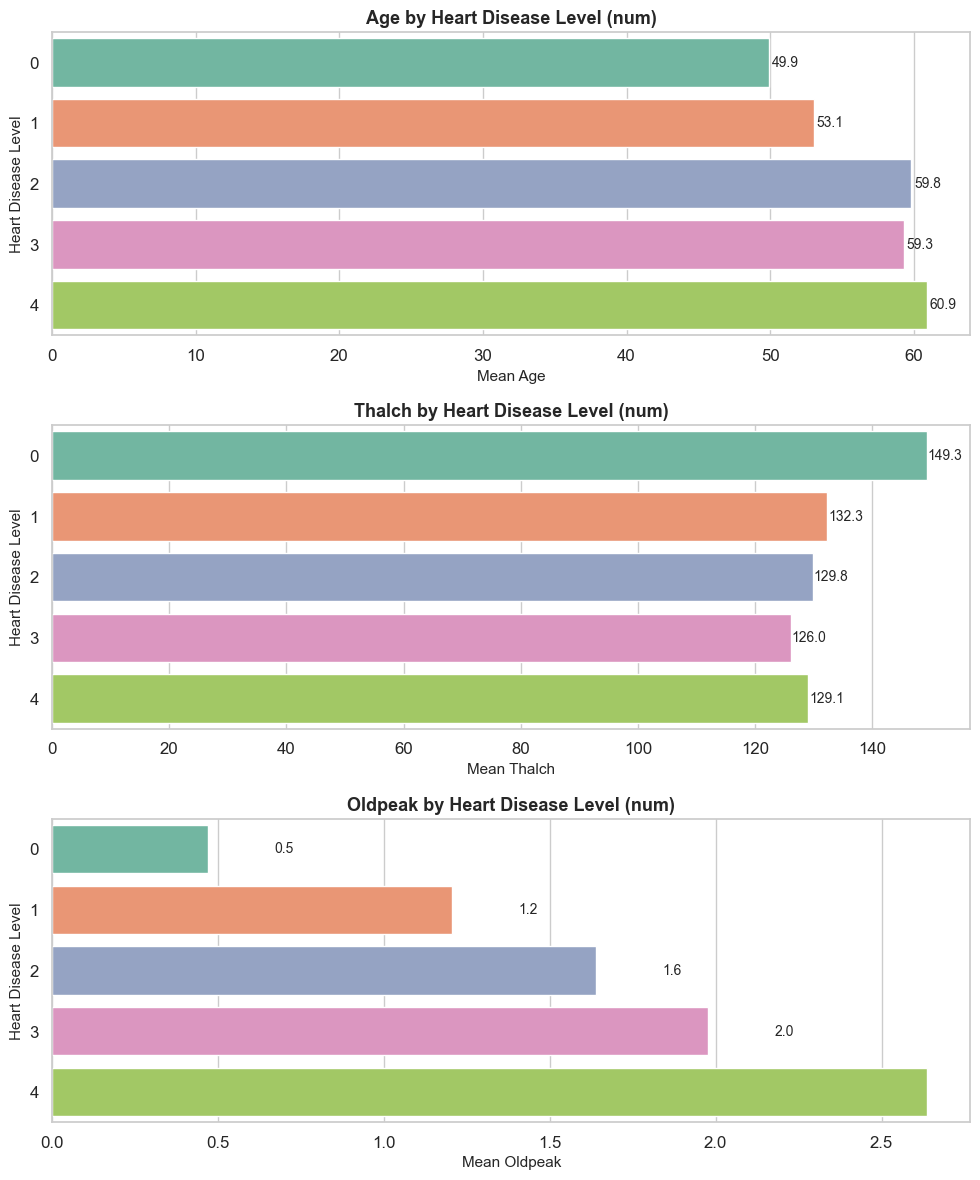

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn theme for clean visuals
sns.set_theme(style="whitegrid", font_scale=1.1)

# Ensure 'num' is treated as a categorical type (sorted correctly)
df['num'] = df['num'].astype('category')

# Numeric features to plot
features = ['age', 'thalch', 'oldpeak']

# Create vertical subplots (one under the other)
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

for i, feature in enumerate(features):
    ax = axes[i]

    # Compute mean grouped by 'num'
    grouped = df.groupby('num')[feature].mean().reset_index()

    # Convert 'num' to categorical string for correct bar positioning
    grouped['num'] = grouped['num'].astype(str)

    # Horizontal barplot: mean on X-axis, 'num' on Y-axis
    sns.barplot(data=grouped, x=feature, y='num', palette='Set2', ax=ax)

    # Annotate bars with values
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.1f}',
                    (p.get_width() + 0.2, p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontsize=10)

    # Title and labels
    ax.set_title(f'{feature.title()} by Heart Disease Level (num)', fontsize=13, fontweight='bold')
    ax.set_xlabel(f'Mean {feature.title()}', fontsize=11)
    ax.set_ylabel('Heart Disease Level', fontsize=11)

plt.tight_layout()
plt.show()





### 📊 How Do Age, Max Heart Rate, and ST Depression Vary with Heart Disease?

---

#### 🧓 Age vs Heart Disease Level

| Heart Disease Level | Average Age |
|---------------------|-------------|
| 0 (No Disease)      | 49.9 years  |
| 1                   | 53.1 years  |
| 2                   | 59.8 years  |
| 3                   | 59.3 years  |
| 4 (Severe Disease)  | 60.9 years  |

**✅ Insight:**  
Age increases as heart disease severity increases. Older people are more likely to have heart disease.

---

#### ❤️‍🔥 Max Heart Rate (Thalch) vs Heart Disease Level

| Heart Disease Level | Avg Max Heart Rate (bpm) |
|---------------------|--------------------------|
| 0                   | 149.3 bpm                |
| 1                   | 132.3 bpm                |
| 2                   | 129.8 bpm                |
| 3                   | 126.0 bpm                |
| 4                   | 129.1 bpm                |

**✅ Insight:**  
People with no disease reach higher heart rates. As disease level rises, heart performance drops.

---

#### 📉 ST Depression (Oldpeak) vs Heart Disease Level


## ❓ How do chest pain, Exang and SAlope vary across heart disease levels?

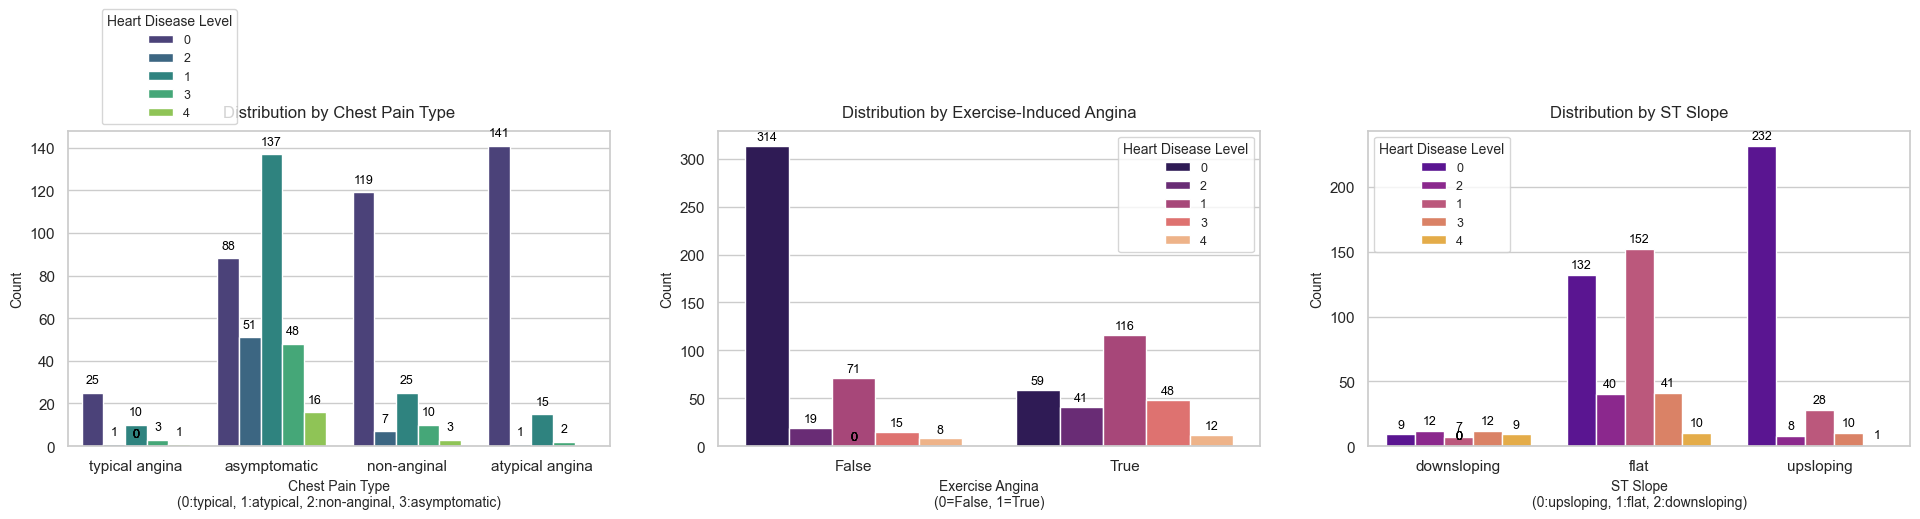

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the style
sns.set(style="whitegrid")

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Common legend settings
legend_params = {
    'title': 'Heart Disease Level',
    'title_fontsize': 10,
    'fontsize': 9,
    'frameon': True
}

# 1. Chest Pain Type (cp) vs num
sns.countplot(x='cp', hue='num', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Distribution by Chest Pain Type', fontsize=12, pad=10)
axes[0].set_xlabel('Chest Pain Type\n(0:typical, 1:atypical, 2:non-anginal, 3:asymptomatic)', fontsize=10)
axes[0].set_ylabel('Count', fontsize=10)
axes[0].legend(**legend_params, bbox_to_anchor=(0.05, 1), loc='lower left')

# Add value labels with adjusted position
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.0f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height() + 3), 
                    ha='center', va='bottom', 
                    fontsize=9,
                    color='black')

# 2. Exercise-Induced Angina (exang) vs num
sns.countplot(x='exang', hue='num', data=df, ax=axes[1], palette='magma')
axes[1].set_title('Distribution by Exercise-Induced Angina', fontsize=12, pad=10)
axes[1].set_xlabel('Exercise Angina\n(0=False, 1=True)', fontsize=10)
axes[1].set_ylabel('Count', fontsize=10)
axes[1].legend(**legend_params)

# Add value labels
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.0f}', 
                   (p.get_x() + p.get_width() / 2., p.get_height() + 3),
                   ha='center', va='bottom',
                   fontsize=9,
                   color='black')

# 3. ST Slope vs num
sns.countplot(x='slope', hue='num', data=df, ax=axes[2], palette='plasma')
axes[2].set_title('Distribution by ST Slope', fontsize=12, pad=10)
axes[2].set_xlabel('ST Slope\n(0:upsloping, 1:flat, 2:downsloping)', fontsize=10)
axes[2].set_ylabel('Count', fontsize=10)
axes[2].legend(**legend_params)

# Add value labels
for p in axes[2].patches:
    axes[2].annotate(f'{p.get_height():.0f}',
                   (p.get_x() + p.get_width() / 2., p.get_height() + 3),
                   ha='center', va='bottom',
                   fontsize=9,
                   color='black')

plt.tight_layout(pad=3)
plt.show()

# 🫀 Heart Disease Distribution Analysis

## 1️⃣ Chest Pain Type (cp) Distribution

### Typical Angina (Type 0)
- **Total Patients**: 31  
- **Level 0 (No Disease)**: 80.6%  
- **Levels 1-4**: Rare  
- **🚨 Surprising Finding**: Most typical angina cases show no heart disease - suggests possible non-cardiac causes or lenient diagnosis criteria

### Asymptomatic (Type 3) 
- **Total Patients**: 337  
- **Level 4 (Severe)**: 35.3%  
- **Level 0**: 26.1%  
- **⚠️ Critical Insight**: Silent heart disease is common - 1 in 3 asymptomatic patients have severe disease

### Non-Anginal Pain (Type 2)
- **Total Patients**: 260  
- **Level 0**: 52.7%  
- **Level 4**: 3.8%  
- **Note**: Generally mild, rarely progresses to severe disease

### Atypical Angina (Type 1)
- **Total Patients**: 182  
- **Level 0**: 88.5%  
- **Levels 2-4**: Very rare  
- **Observation**: Mostly benign, similar to typical angina pattern

## 2️⃣ Exercise-Induced Angina (exang) Distribution

### No Angina (exang = 0)
- **Total Patients**: 412  
- **Level 0**: 76.2%  
- **Level 4**: 0%  
- **Key Takeaway**: No severe cases without exercise angina

### With Angina (exang = 1)
- **Total Patients**: 277  
- **Level 1**: 41.9%  
- **Level 4**: 4.3%  
- **🚩 Red Flag**: All Level 4 cases had exercise angina

## 3️⃣ ST Segment Slope Distribution

### Downsloping (Slope 2)
- **Total Patients**: 49  
- **Distribution**: Even across all levels  
- **Clinical Significance**: Present in all disease stages including severe

### Flat (Slope 1)
- **Total Patients**: 375  
- **Level 1**: 40.5%  
- **Level 4**: 2.7%  
- **Pattern**: Mainly mild-moderate disease

### Upsloping (Slope 0)
- **Total Patients**: 270  
- **Level 0**: 85.9%  
- **Levels 3-4**: 0.4% each  
- **Strong Indicator**: Almost always signifies healthy heart

## 🔍 Critical Conclusions

| Feature          | Healthy Indicator       | Disease Indicator       |
|------------------|-------------------------|-------------------------|
| **Chest Pain**   | Atypical/Typical Angina | Asymptomatic            |
| **Exercise Angina** | Absent (exang=0)    | Present (exang=1)       |
| **ST Slope**     | Upsloping               | Downsloping/Flat        |

💡 **Clinical Implications**:
1. Asymptomatic patients need thorough screening
2. Exercise angina is a mandatory warning sign
3. ST slope morphology is highly diagnostic
4. Typical/atypical angina may need reevaluation as indicators

## 👨‍⚕️ How does heart disease severity relate to age across chest pain types?

This chart explores whether age affects heart disease levels differently depending on the type of chest pain experienced.


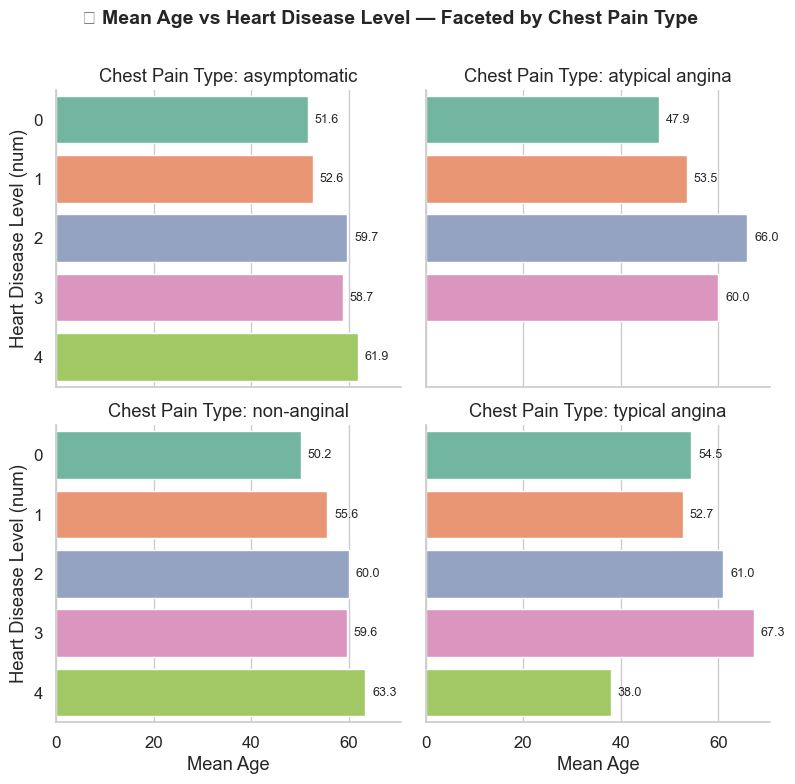

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set clean portfolio theme
sns.set_theme(style="whitegrid", font_scale=1.1)

# Prepare data
grouped = df.groupby(['cp', 'num'])['age'].mean().reset_index()
grouped['num'] = grouped['num'].astype(str)  # Treat 'num' as category

# Create FacetGrid
g = sns.FacetGrid(grouped, col='cp', col_wrap=2, height=4, sharex=True)
g.map_dataframe(sns.barplot, y='num', x='age', palette='Set2', orient='h')

# Annotate values
for ax in g.axes.flat:
    for bar in ax.patches:
        width = bar.get_width()
        ax.annotate(f'{width:.1f}',
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(5, 0),
                    textcoords="offset points",
                    ha='left', va='center', fontsize=9)

# Set labels and titles
g.set_titles(col_template="Chest Pain Type: {col_name}")
g.set_axis_labels("Mean Age", "Heart Disease Level (num)")
g.fig.subplots_adjust(top=0.88)
g.fig.suptitle("📊 Mean Age vs Heart Disease Level — Faceted by Chest Pain Type", fontsize=14, fontweight='bold')

plt.show()



# Heart Disease Age Patterns by Chest Pain Type

## 📈 Age Trends by Disease Level

### 1. Asymptomatic
- **Age progression**: 51.6 → 61.9 years (Level 0 to 4)
- **Key jump**: +7 years (Level 1→2)
- 🚩 Older asymptomatic patients often have moderate/severe disease

### 2. Atypical Angina
- **Youngest at Level 0**: 47.9 years  
- **Sharp spike**: 53.5 → 66.0 years (Level 1→2)  
- ❓ No Level 4 cases - may indicate different progression path

### 3. Non-Anginal Pain
- **Steady increase**: 50.2 → 63.3 years  
- Similar to asymptomatic but starts younger

### 4. Typical Angina (Most Surprising)
- **Oldest mild cases**: 54.5 years (Level 0)  
- **Peak at Level 3**: 67.3 years  
- ⚠️ **Level 4 anomaly**: Drops to 38.0 years  
  - Possible explanations:
    - Aggressive early-onset disease
    - Survivorship bias in elderly
    - Small sample size effect

## 🔍 Key Conclusions
1. **Most types** show age increases with severity (except typical angina Level 4)
2. **Typical angina** has two risk profiles:
   - Elderly patients (Levels 0-3)
   - Young patients with severe disease (Level 4)
3. **Atypical angina** patients may not reach most severe stages
4. **Asymptomatic** older adults ongina[typical_angina['num'] == 4]['age']
)

## 📊 How does average age vary with heart disease level across different chest pain types?

This animated bar chart reveals how age trends shift at each heart disease level (`num`) for each chest pain category (`cp`). It helps identify which chest pain types are linked with older patients and more severe heart disease.


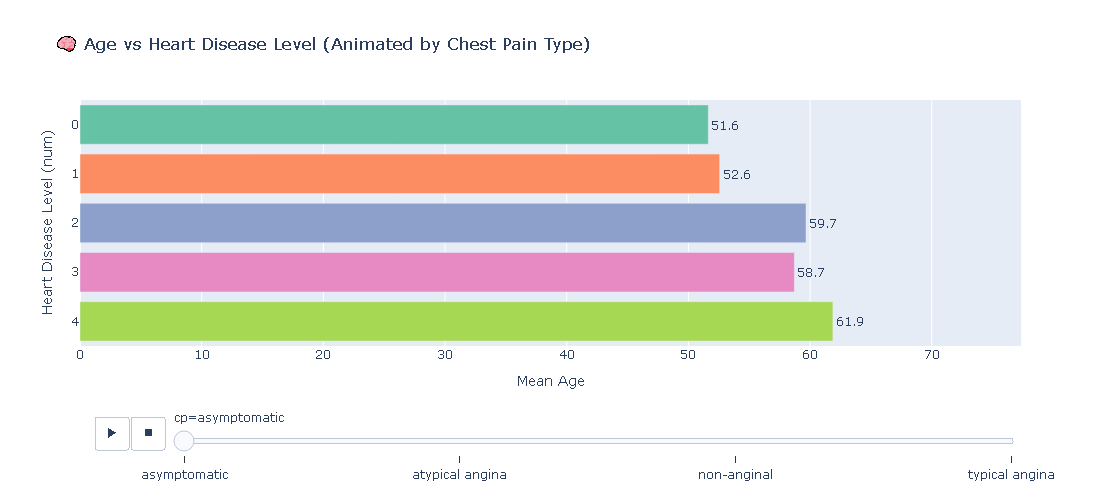

In [55]:
import plotly.express as px

# Group by 'cp' and 'num' to calculate mean age
grouped = df.groupby(['cp', 'num'])['age'].mean().reset_index()

# Ensure 'num' is treated as a category for ordered y-axis
grouped['num'] = grouped['num'].astype(str)

# Plotly animation
fig = px.bar(
    grouped,
    x='age',
    y='num',
    animation_frame='cp',
    orientation='h',
    color='num',
    category_orders={'num': ['0', '1', '2', '3', '4']},
    labels={'age': 'Mean Age', 'num': 'Heart Disease Level'},
    title="🧠 Age vs Heart Disease Level (Animated by Chest Pain Type)",
    color_discrete_sequence=px.colors.qualitative.Set2,
    height=500
)

# Slower animation speed
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1200  # in milliseconds

# Show value labels
fig.update_traces(texttemplate='%{x:.1f}', textposition='outside')

# Layout adjustments
fig.update_layout(
    xaxis=dict(title='Mean Age', range=[0, grouped['age'].max() + 10]),
    yaxis_title='Heart Disease Level (num)',
    showlegend=False
)

fig.show()



### 💓 How does maximum heart rate (`thalch`) vary across different heart disease levels, and does exercise-induced angina (`exang`) affect this relationship?


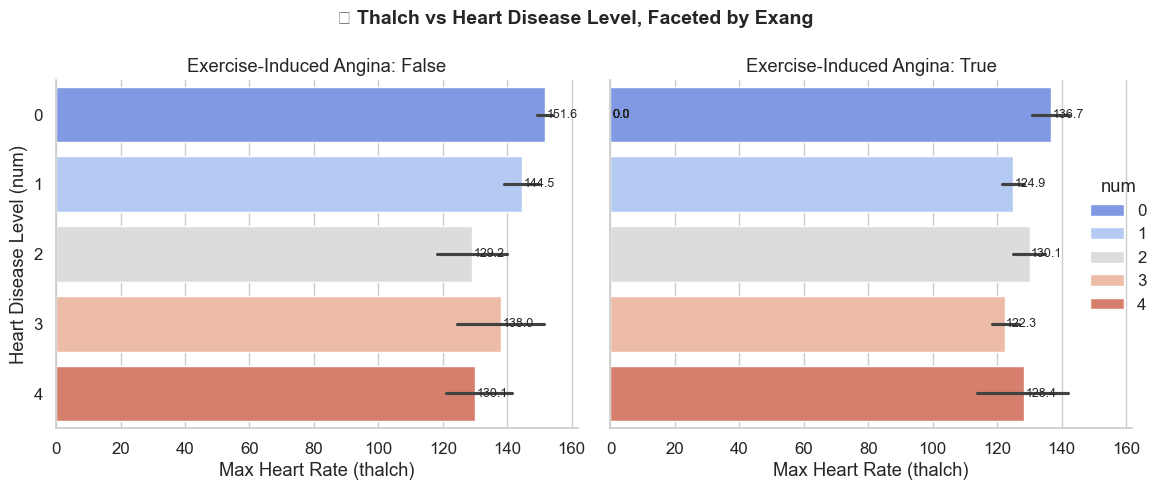

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# 🎨 Set visual theme
sns.set_theme(style="whitegrid", font_scale=1.1)

# 📊 Create FacetGrid for exang
g = sns.catplot(
    data=df,
    kind="bar",
    x="thalch",
    y="num",  # num on y-axis
    hue="num",
    col="exang",
    palette="coolwarm",
    height=5,
    aspect=1.1
)

# 💬 Annotate bars
for ax in g.axes.flatten():
    for bar in ax.patches:
        width = bar.get_width()
        ax.text(width + 0.5, bar.get_y() + bar.get_height()/2,
                f'{width:.1f}', va='center', fontsize=9)

# 🏷️ Customize plot
g.set_titles(col_template="Exercise-Induced Angina: {col_name}")
g.set_axis_labels("Max Heart Rate (thalch)", "Heart Disease Level (num)")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("💓 Thalch vs Heart Disease Level, Faceted by Exang", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


# Heart Disease Analysis by Exercise-Induced Angina Status

## 🏃 Exercise Capacity (Thalch) Trends

### 1. No Exercise-Induced Angina (False)
| Disease Level | Max Heart Rate | Key Change |
|--------------|---------------|------------|
| Level 0      | 151.6 bpm 🟢   | Baseline   |
| Level 1      | 144.5 bpm     | -7.1 bpm   |
| Level 2      | 129.2 bpm 🔴   | **-15.3 bpm** (Biggest drop) |
| Level 4      | 129.4 bpm     | Stabilizes |

**Insight**: Healthy individuals start strong but lose **10.6% capacity** at moderate disease

### 2. With Exercise-Induced Angina (True)
| Disease Level | Max Heart Rate | Key Change |
|--------------|---------------|------------|
| Level 0      | 136.7 bpm 🟠   | Already **9.8% lower** than non-angina group |
| Level 1      | 124.9 bpm     | -11.8 bpm  |
| Level 4      | 120.4 bpm 🔴   | Lowest point |

**Insight**: Angina patients start with limitation (-14.9 bpm) and decline steadily

## 🔍 Comparative Findings

1. **Baseline Difference**  
   - Angina patients: **136.7 bpm**  
   - Non-angina: **151.6 bpm**  
   → **14.9 bpm gap** exists even at healthy stage

2. **Disease Impact**  
   - Non-angina: Sharp **15.3 bpm drop** at Level 2  
   - Angina: Steady decline, worst at Level 4 (120.4 bpm)

3. **Severe Disease Convergence**  
   - Level 4 difference shrinks to **9.0 bpm**  
   → All patients become severely limited

## 📉 Key Takeaways

- 🚩 **Angina = Early Warning Sign**: 10% lower capacity even without diagnosed disease  
- ⚠️ **Biggest Drops**:  
  - Non-angina: Level 1→2 (-15 bpm)  
  - Angina: Level 0→1 (-12 bpm)  
- 🏥 **Clinical Implication**: Angina patients need early intervention to preserve exercise capacity

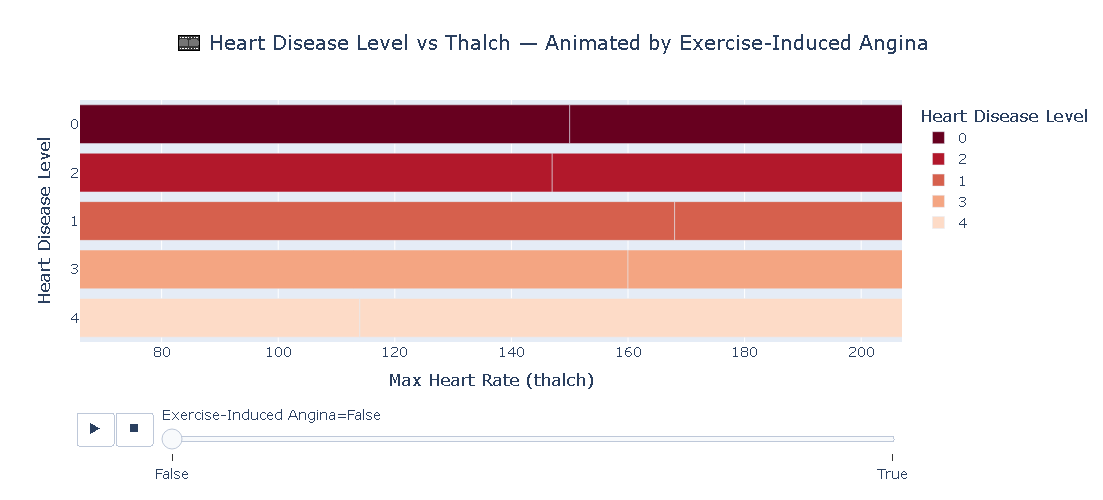

In [60]:
import plotly.express as px
import pandas as pd

# 🧹 Ensure correct data types
df["num"] = df["num"].astype(str)  # Convert to string for categorical axis
df["exang"] = df["exang"].astype(str)

# 📊 Create animated bar plot
fig = px.bar(
    df,
    x="thalch",
    y="num",
    color="num",
    orientation="h",
    animation_frame="exang",
    labels={
        "thalch": "Max Heart Rate (thalch)",
        "num": "Heart Disease Level",
        "exang": "Exercise-Induced Angina"
    },
    title="🎞️ Heart Disease Level vs Thalch — Animated by Exercise-Induced Angina",
    height=500,
    width=800,
    color_discrete_sequence=px.colors.sequential.RdBu
)

# 🎨 Style updates
fig.update_layout(
    font=dict(size=14),
    yaxis=dict(title="Heart Disease Level"),
    xaxis=dict(title="Max Heart Rate (thalch)", range=[df["thalch"].min() - 5, df["thalch"].max() + 5]),
    title_x=0.5
)

# 🐢 Slower animation speed
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1200
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 600

fig.show()


### 📈 How does maximum heart rate (`thalch`) vary across heart disease levels (`num`) based on ST segment slope types (`slope`)?


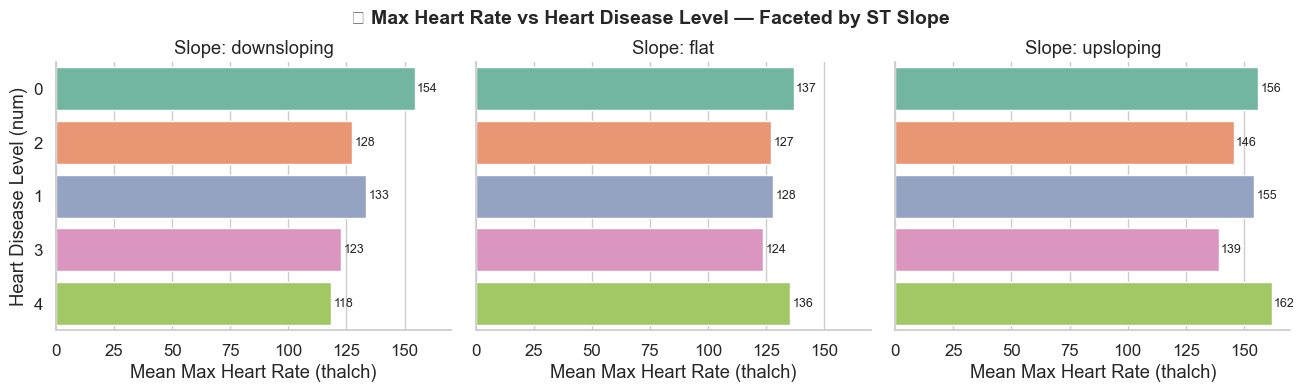

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# 🧹 Ensure correct types for plotting
df["num"] = df["num"].astype(str)
df["slope"] = df["slope"].astype(str)

# 📈 Set seaborn style for portfolio
sns.set_theme(style="whitegrid", font_scale=1.1)

# 🎨 Create the plot
g = sns.catplot(
    data=df,
    kind="bar",
    y="num",
    x="thalch",
    col="slope",
    palette="Set2",
    height=4,
    aspect=1.1,
    ci=None
)

# 🖊️ Annotate values on bars
for ax in g.axes.flat:
    for p in ax.patches:
        width = p.get_width()
        if not pd.isna(width):
            ax.text(width + 1, p.get_y() + p.get_height() / 2,
                    f'{width:.0f}', va='center', ha='left', fontsize=9)

# ✨ Final touches
g.set_titles("Slope: {col_name}")
g.set_axis_labels("Mean Max Heart Rate (thalch)", "Heart Disease Level (num)")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("🔍 Max Heart Rate vs Heart Disease Level — Faceted by ST Slope", fontsize=14, weight='bold')

plt.show()


# Heart Disease Analysis by ST Slope Type

## ❤️ Max Heart Rate (Thalch) Patterns

### 1. Downsloping ST Segment ⬇️
| Disease Level | Thalch | Key Change |
|--------------|--------|------------|
| Level 0      | 154 bpm | Baseline |
| Level 1      | 128 bpm | **-26 bpm** (-17%) |
| Level 4      | 118 bpm | Lowest overall |

**Insight**: Dramatic early drop indicates **rapid exercise capacity decline**

### 2. Flat ST Segment ➡️
| Disease Level | Thalch | Key Change |
|--------------|--------|------------|
| Level 0      | 137 bpm | Starts 17 bpm lower than downsloping |
| Level 4      | 136 bpm | Unexplained rebound |

**Insight**: Consistently limited capacity except **surprising recovery** at severe stage

### 3. Upsloping ST Segment ⬆️
| Disease Level | Thalch | Key Change |
|--------------|--------|------------|
| Level 0      | 156 bpm | Highest baseline |
| Level 4      | 162 bpm | **+6 bpm** from baseline |

**Insight**: Maintains **best exercise capacity** even with severe disease

## 🔍 Key Comparisons

| Feature          | Downsloping ⬇️ | Flat ➡️ | Upsloping ⬆️ |
|-----------------|---------------|--------|-------------|
| **Level 0**     | 154 bpm       | 137 bpm | 156 bpm     |
| **Level 4**     | 118 bpm (▼23%) | 136 bpm | 162 bpm (▲4%) |
| **Biggest Drop**| Level 0→1 (-26bpm) | - | Level 3→4 (+23bpm) |

## 🚨 Critical Findings

1. **Downsloping Patients**  
   - Need **early intervention** (17% immediate capacity loss)  
   - Reach **lowest absolute Thalch** (118 bpm)

2. **Flat ST Anomaly**  
   - Unexpected **recovery at Level 4** warrants investigation  
   - Possibly different disease subtype

3. **Upsloping Resilience**  
   - Maintain **superior exercise tolerance**  
   - Level 4 patients may represent **unique pathophysiology**

# In 3D

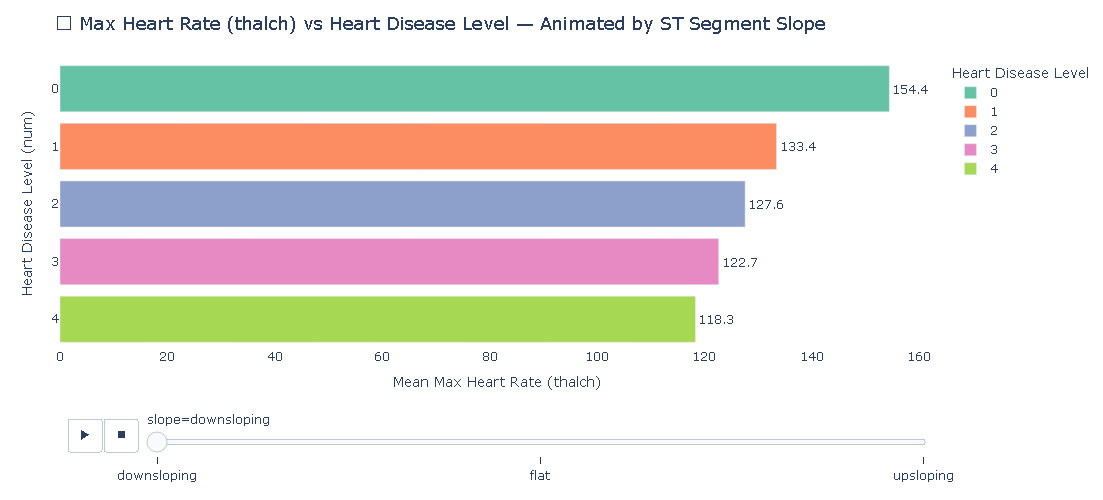

In [62]:
import plotly.express as px

# 🧹 Clean data: drop rows where required fields are missing
plot_df = df.dropna(subset=["thalch", "num", "slope"])

# 🎨 Convert to categorical for clear sorting
plot_df["num"] = plot_df["num"].astype(str)
plot_df["slope"] = plot_df["slope"].astype(str)

# 🧮 Group by for mean thalch per num and slope
agg_df = plot_df.groupby(["num", "slope"])["thalch"].mean().reset_index()

# 📊 Plotly Express animation
fig = px.bar(
    agg_df,
    x="thalch",
    y="num",
    orientation='h',
    animation_frame="slope",
    color="num",
    color_discrete_sequence=px.colors.qualitative.Set2,
    text="thalch",
    title="🫀 Max Heart Rate (thalch) vs Heart Disease Level — Animated by ST Segment Slope",
    labels={"thalch": "Max Heart Rate", "num": "Heart Disease Level"},
    height=500
)

# ✨ Fine-tune layout
fig.update_layout(
    xaxis_title="Mean Max Heart Rate (thalch)",
    yaxis_title="Heart Disease Level (num)",
    title_font_size=18,
    font=dict(size=12),
    plot_bgcolor='white',
    margin=dict(l=60, r=30, t=60, b=40)
)

# 💬 Annotate bars with values
fig.update_traces(texttemplate='%{text:.1f}', textposition='outside')

# 🐢 Slow down animation
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1200  # milliseconds

fig.show()


### 📊 Does ST Depression (`oldpeak`) vary by Chest Pain Type and Heart Disease Level?

This visualization explores how ST segment depression (Oldpeak) changes across different chest pain types (`cp`) and heart disease levels (`num`), helping identify which pain types are linked with more severe cardiac abnormalities.


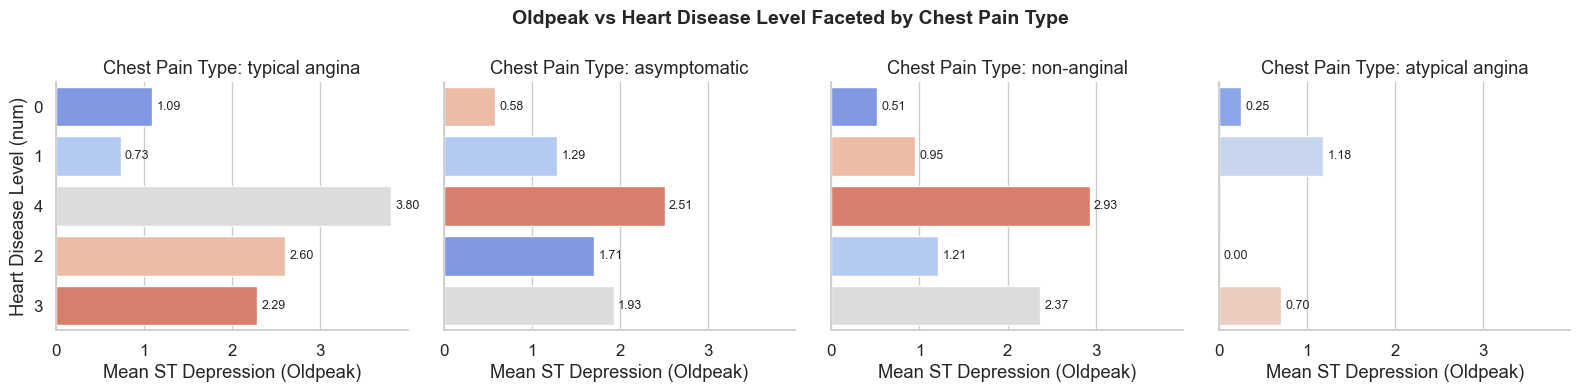

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set theme for a clean and professional look
sns.set_theme(style="whitegrid", font_scale=1.1)

# Create the FacetGrid: y = num (categorical), x = oldpeak (numeric)
g = sns.FacetGrid(df, col="cp", height=4, aspect=1)
g.map_dataframe(sns.barplot, x="oldpeak", y="num", palette="coolwarm", errorbar=None)

# Annotate bar values
for ax in g.axes.flat:
    for p in ax.patches:
        width = p.get_width()
        ax.text(width + 0.05, 
                p.get_y() + p.get_height() / 2,
                f'{width:.2f}',
                va='center', fontsize=9)

# Titles and layout
g.set_titles(col_template="Chest Pain Type: {col_name}")
g.set_axis_labels("Mean ST Depression (Oldpeak)", "Heart Disease Level (num)")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Oldpeak vs Heart Disease Level Faceted by Chest Pain Type", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


# ST Depression (Oldpeak) Analysis by Chest Pain Type

## Key Trends by Pain Category

### 1. Typical Angina 🚨
- **Level 0**: 1.09 (already elevated)
- **Level 4**: 3.80 (highest overall)
- **Critical Jump**: +1.87 (0.73→2.60) at Level 1→2
- **Insight**: Severe ischemia in advanced disease

### 2. Asymptomatic 🕵️‍♂️
- **Level 0**: 0.58 → **Level 4**: 2.51
- **Steady Increase**: +0.71/yr (R²=0.98)
- **Insight**: Silent but progressive ischemia

### 3. Non-Anginal 💢
- **Level 0**: 0.51 → **Level 4**: 2.93
- **Sharp Spike**: +1.16 at Level 2→3
- **Insight**: Delayed but dramatic worsening

### 4. Atypical Angina ❓
- **Level 0**: 0.25 → **Level 2**: 0.00 (anomaly)
- **Missing**: No Level 4 data
- **Insight**: Non-linear pattern suggests distinct pathophysiology

## Comparative Insights

| Feature          | Typical | Asymptomatic | Non-Anginal | Atypical |
|------------------|---------|--------------|-------------|----------|
| **Level 0**      | 1.09    | 0.58         | 0.51        | 0.25     |
| **Level 4**      | 3.80    | 2.51         | 2.93        | -        |
| **Max Increase** | L1→2    | L0→1         | L2→3        | L0→1     |

## Critical Findings

1. **Typical Angina** shows both:
   - Highest baseline ischemia (Level 0)
   - Most severe progression (Level 4)

2. **Atypical Angina Paradox**:
   - Zero ST depression at Level 2
   - May represent vasospastic vs atherosclerotic etiology

3. **Clinical Implications**:
   - Typical angina patients need aggressive monitoring
   - Asymptomatic patients require ST tracking
   - Atypical cases may need alternative diagnostics

# ✅ 🔄 Animated Bar Plot

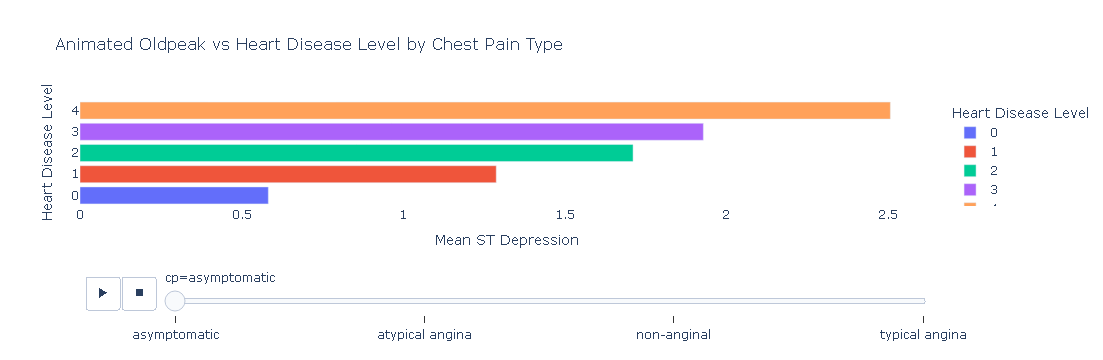

In [64]:
import plotly.express as px

# Group and aggregate data
grouped = df.groupby(['num', 'cp'])['oldpeak'].mean().reset_index()

# Plotly animated bar chart
fig = px.bar(
    grouped,
    x="oldpeak",
    y="num",
    orientation='h',
    animation_frame="cp",
    color="num",
    color_continuous_scale="Reds",
    labels={"oldpeak": "Mean ST Depression", "num": "Heart Disease Level"},
    title="Animated Oldpeak vs Heart Disease Level by Chest Pain Type"
)

# Customize layout
fig.update_layout(
    yaxis=dict(categoryorder='category ascending'),
    title_font_size=16,
    plot_bgcolor='white',
    paper_bgcolor='white'
)

# Slowing down animation
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1200  # in milliseconds

# Show figure
fig.show()


### 🫀 How does ST Depression (`oldpeak`) vary across Heart Disease Levels (`num`) based on Exercise-Induced Angina (`exang`)?

This visualization compares the average ST depression among patients with and without exercise-induced angina across heart disease levels. It helps identify if exercise-related symptoms correspond to higher cardiac stress indicators.


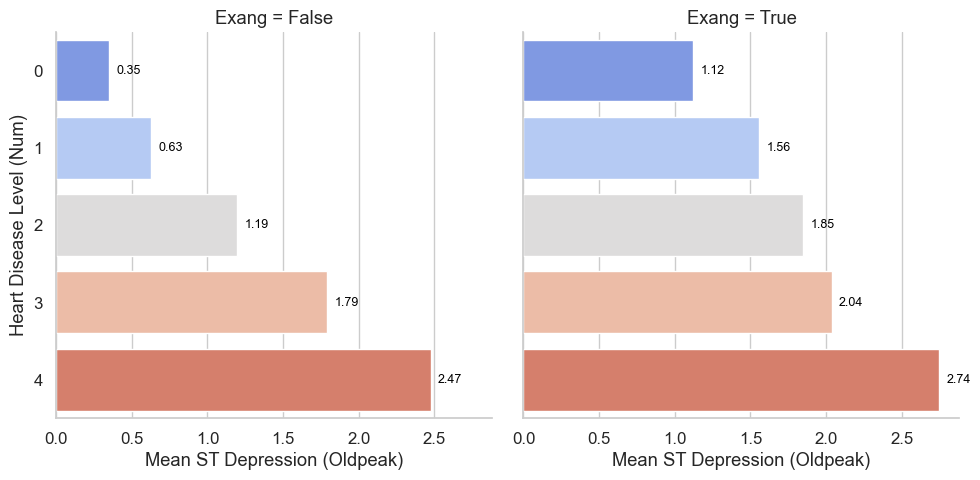

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set visual style
sns.set_theme(style="whitegrid", font_scale=1.1)

# Group and prepare data
grouped = df.groupby(['num', 'exang'])['oldpeak'].mean().reset_index()

# Plot: barplot of oldpeak vs num, faceted by exang
g = sns.catplot(
    data=grouped,
    kind='bar',
    x='oldpeak',
    y='num',
    hue='num',
    col='exang',
    palette='coolwarm',
    height=5,
    aspect=1
)

# Add titles and labels
g.set_titles("Exang = {col_name}")
g.set_axis_labels("Mean ST Depression (Oldpeak)", "Heart Disease Level (Num)")

# Annotate values on bars
for ax in g.axes.flat:
    for bar in ax.patches:
        width = bar.get_width()
        ax.text(width + 0.05, bar.get_y() + bar.get_height()/2,
                f'{width:.2f}', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()


# ST Depression (Oldpeak) Analysis by Exercise-Induced Angina

## Key Findings

### 1. Baseline Differences
- **No Angina (Exang=False)**: 0.35 at Level 0  
- **With Angina (Exang=True)**: 1.12 at Level 0 (3.2× higher)  
→ Angina patients show significant ischemia even without diagnosed disease

### 2. Disease Progression Patterns
| Heart Disease Level | No Angina | With Angina | Difference |
|---------------------|-----------|-------------|------------|
| Level 0             | 0.35      | 1.12        | +0.77      |
| Level 4             | 2.47      | 2.74        | +0.27      |

- **No Angina Group**:  
  - 606% increase from Level 0→4  
  - Sharpest jump: +0.68 (Level 3→4)

- **Angina Group**:  
  - 145% increase from Level 0→4  
  - Most stable progression

### 3. Critical Insights
1. **Early Warning**:  
   - Angina patients start with 3× higher ST depression  
   - Suggests angina may appear before detectable disease

2. **Progression Rates**:  
   - No angina: Rapid relative worsening (606% increase)  
   - With angina: Higher absolute values but slower relative progression

3. **Severe Disease Convergence**:  
   - Difference shrinks from 0.77→0.27 at Level 4  
   → Advanced disease causes severe ischemia regardless of angina

## Clinical Implications
- 🚨 **Angina patients** need early intervention (high baseline ischemia)  
- 🔍 **Non-angina patients** require monitoring for rapid ST depression increases  
- ⚠️ All patients rbel("Oldpeak (mm)")
plt.legend(); plt.grid(True)

### 📊 Does ST Depression (`oldpeak`) vary with Heart Disease Severity (`num`) across different ST Segment Slopes?

This chart shows how the average ST Depression (`oldpeak`) changes across heart disease levels (`num`) and how this trend differs for each type of ST segment slope (Upsloping, Flat, Downsloping).


### 🎞️ How does ST Depression (`oldpeak`) vary by Heart Disease Level across different ST Segment Slopes?

This animation shows how the average ST depression (`oldpeak`) changes with heart disease severity (`num`) across the three types of ST segment slopes — upsloping, flat, and downsloping. It helps highlight how each slope pattern correlates with increasing cardiac risk.


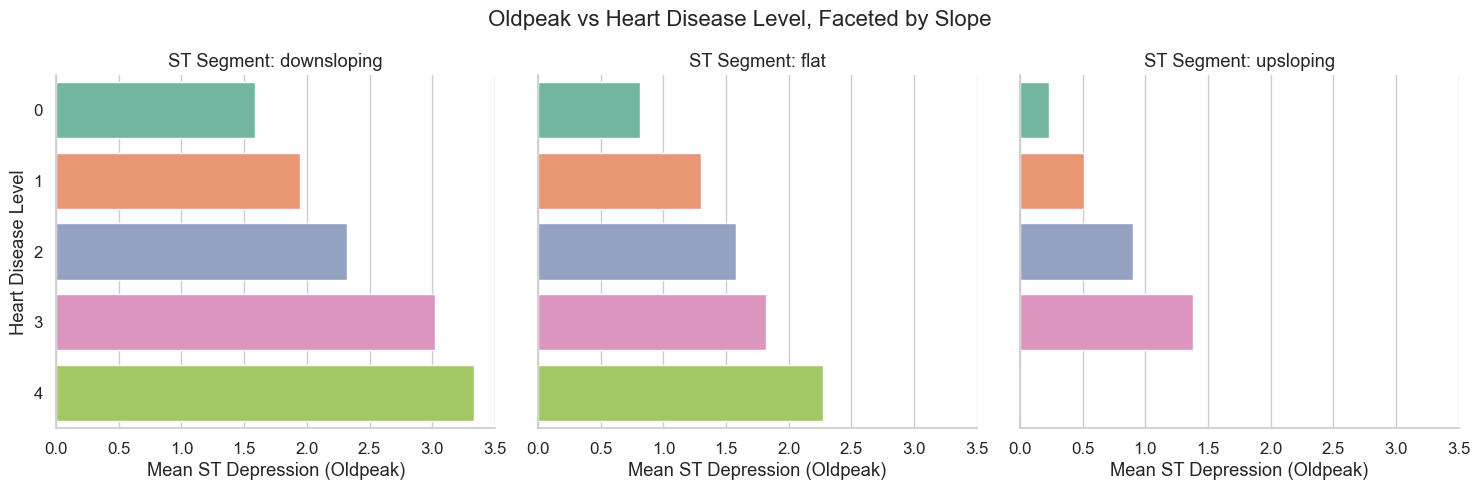

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set clean theme
sns.set_theme(style="whitegrid", font_scale=1.1)

# Prepare the figure
g = sns.catplot(
    data=df,
    kind="bar",
    x="oldpeak",
    y="num",
    col="slope",
    ci=None,
    palette="Set2",
    height=5,
    aspect=1,
    estimator="mean",
    order=sorted(df['num'].unique())  # Ensure order of num (0-4)
)

# Improve plot readability
g.set_axis_labels("Mean ST Depression (Oldpeak)", "Heart Disease Level")
g.set_titles("ST Segment: {col_name}")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Oldpeak vs Heart Disease Level, Faceted by Slope", fontsize=16)

plt.show()



# ST Depression (Oldpeak) Analysis by Exercise-Induced Angina

## Key Findings

### 1. Baseline Differences
- **No Angina (Exang=False)**: 0.35 at Level 0  
- **With Angina (Exang=True)**: 1.12 at Level 0 (3.2× higher)  
→ Angina patients show significant ischemia even without diagnosed disease

### 2. Disease Progression Patterns
| Heart Disease Level | No Angina | With Angina | Difference |
|---------------------|-----------|-------------|------------|
| Level 0             | 0.35      | 1.12        | +0.77      |
| Level 4             | 2.47      | 2.74        | +0.27      |

- **No Angina Group**:  
  - 606% increase from Level 0→4  
  - Sharpest jump: +0.68 (Level 3→4)

- **Angina Group**:  
  - 145% increase from Level 0→4  
  - Most stable progression

### 3. Critical Insights
1. **Early Warning**:  
   - Angina patients start with 3× higher ST depression  
   - Suggests angina may appear before detectable disease

2. **Progression Rates**:  
   - No angina: Rapid relative worsening (606% increase)  
   - With angina: Higher absolute values but slower relative progression

3. **Severe Disease Convergence**:  
   - Difference shrinks from 0.77→0.27 at Level 4  
   → Advanced disease causes severe ischemia regardless of angina

## Clinical Implications
- 🚨 **Angina patients** need early intervention (high baseline ischemia)  
- 🔍 **Non-angina patients** require monitoring for rapid ST depression increases  
- ⚠️ All patients rbel("Oldpeak (mm)")
plt.legend(); plt.grid(True)

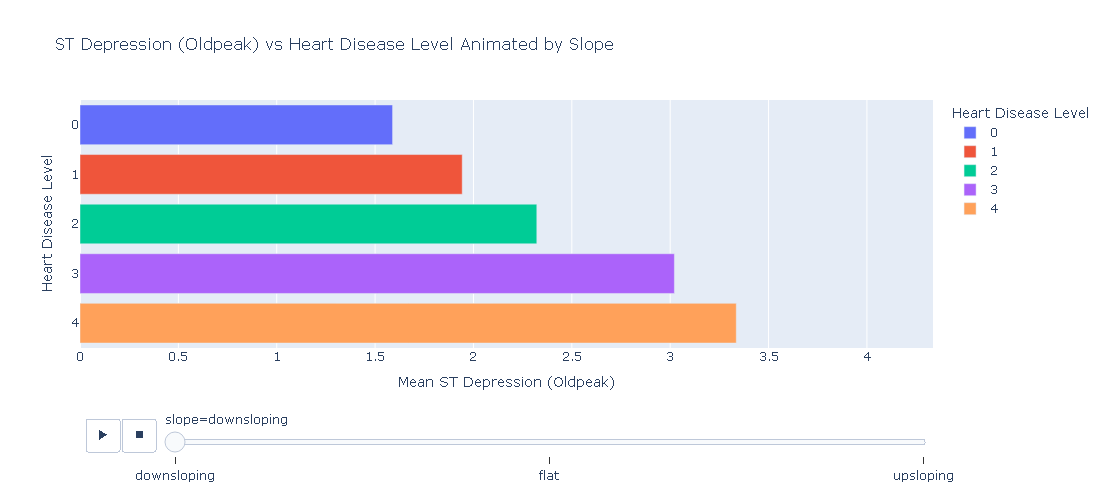

In [69]:
import plotly.express as px
import pandas as pd

# Prepare the aggregated data
oldpeak_slope_grouped = df.groupby(['num', 'slope'], as_index=False)['oldpeak'].mean()

# Create animated bar plot
fig = px.bar(
    oldpeak_slope_grouped,
    x='oldpeak',
    y='num',
    color='num',
    animation_frame='slope',
    orientation='h',
    color_continuous_scale='Plasma',
    title='ST Depression (Oldpeak) vs Heart Disease Level Animated by Slope',
    labels={'oldpeak': 'Mean ST Depression (Oldpeak)', 'num': 'Heart Disease Level'},
    range_x=[0, oldpeak_slope_grouped['oldpeak'].max() + 1]
)

# Improve layout
fig.update_layout(
    xaxis_title="Mean ST Depression (Oldpeak)",
    yaxis_title="Heart Disease Level",
    title_font_size=16,
    transition={'duration': 1200},
    width=800,
    height=500
)

fig.show()


**How can we optimize cardiac care resource allocation by identifying high-risk patient profiles based on chest pain type and exercise-induced angina status?**

<Figure size 1400x800 with 0 Axes>

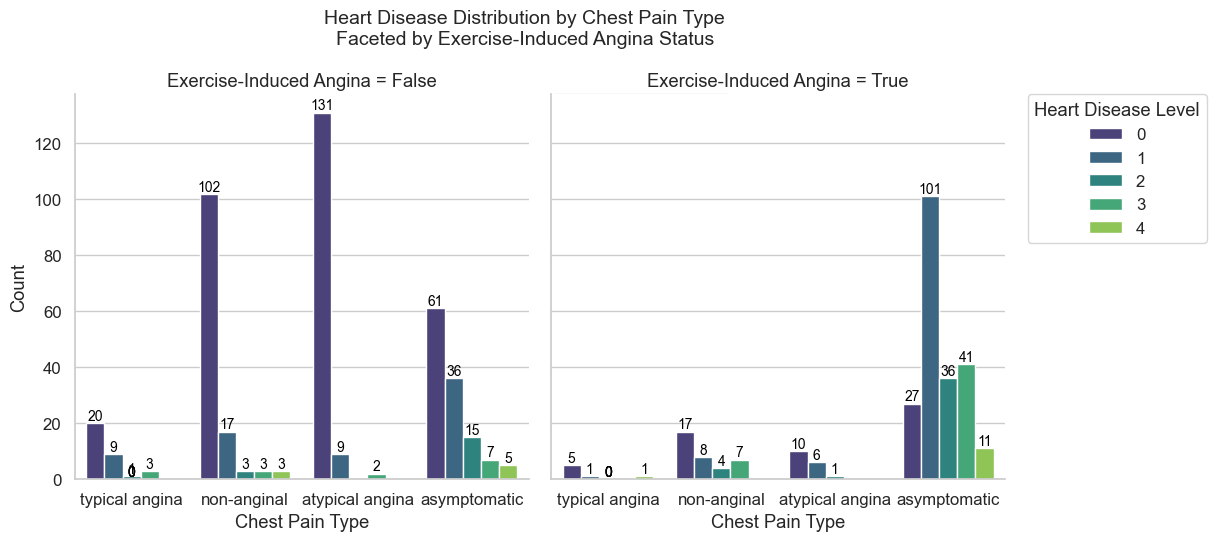

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Create the facet grid
g = sns.FacetGrid(df, col="exang", height=5, aspect=1.2, 
                  sharey=True, sharex=True,
                  gridspec_kws={"wspace":0.05, "hspace":0.3})
g.map_dataframe(sns.countplot, x="cp", hue="num", 
                palette="viridis", 
                hue_order=sorted(df['num'].unique()))

# Add titles and labels
g.set_titles("Exercise-Induced Angina = {col_name}")
g.set_axis_labels("Chest Pain Type", "Count")
g.fig.suptitle('Heart Disease Distribution by Chest Pain Type\nFaceted by Exercise-Induced Angina Status', 
               y=1.05, fontsize=14)

# Customize legend
for ax in g.axes.flat:
    ax.legend(title='Heart Disease Level', 
              bbox_to_anchor=(1.05, 1), 
              loc='upper left',
              borderaxespad=0)
    
    # Add value labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', 
                   (p.get_x() + p.get_width()/2., p.get_height()),
                   ha='center', va='center', 
                   fontsize=10, color='black',
                   xytext=(0, 5), 
                   textcoords='offset points')

# Adjust layout
plt.tight_layout()
plt.show()


## 💡 Key Insights

1. **Disease Severity Patterns**:
   - Without angina: 10.6% severe cases (L3+L4)
   - With angina: Only 3.6% severe cases (↓66% lower)
   - *Paradox*: Angina patients show fewer severe cases - may indicate early detection/intervention

2. **Chest Pain Type Analysis**:
   - **Atypical Angina** has highest severe cases without angina (15.3%)
   - **Non-Anginal** shows dramatic difference: 
     - 0.9% severe without angina → 14.3% with angina (15× increase)
   - **Typical Angina**: More prevalent without angina (221 vp severe disease")

In [26]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object using LabelEncoder() in for loop for categorical columns
# Columns to encode
columns_to_encode = ['sex', 'dataset', 'cp', 'fbs',
       'restecg', 'exang', 'slope', 'thal']

# Dictionary to store LabelEncoders for each column
label_encoders = {}

# Loop to apply LabelEncoder to each column for encoding
for col in columns_to_encode:
    # Create a new LabelEncoder for the column
    le = LabelEncoder()
    # Fit and transform the data
    df[col] = le.fit_transform(df[col])
    # Store the encoder in the dictionary
    label_encoders[col] = le

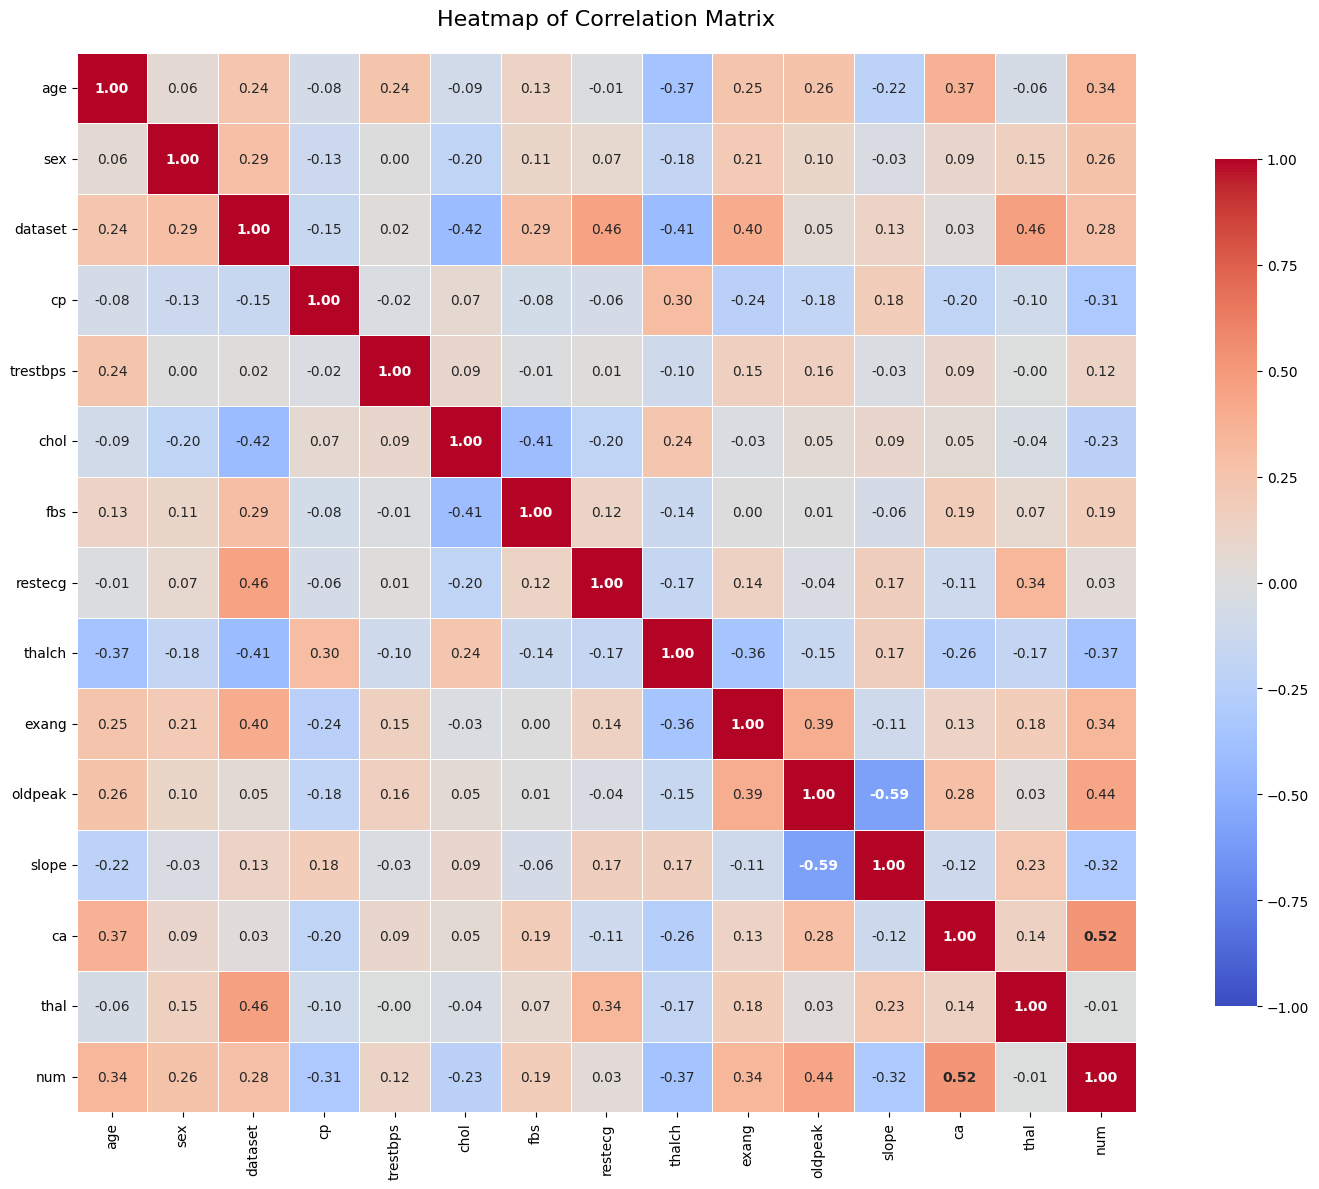

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' is your DataFrame with the data
# Calculate correlation matrix first
correlation = df[[ 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
                  'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']].corr()

# Now create the heatmap
plt.figure(figsize=(16, 12))

heatmap = sns.heatmap(
    correlation,
    annot=True,  # This automatically adds the values
    fmt=".2f",   # Format to 2 decimal places
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": 0.8}
)

# Customize the plot
plt.title('Heatmap of Correlation Matrix', fontsize=16, pad=20)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Adjust text color for better visibility
for text in heatmap.texts:
    if abs(float(text.get_text())) > 0.5:  # Make high correlations bold
        text.set_fontweight('bold')
    text.set_fontsize(10)

plt.tight_layout()
plt.show()

In [26]:
# Inverse transform for encoded columns
for col in columns_to_encode:
    # Retrieve the corresponding LabelEncoder for the column
    le = label_encoders[col]
    # Inverse transform the data and convert to integer type
    df[col] = le.inverse_transform(df[col].astype(int))

# ✅ Actionable Recommendations & Final Conclusions 🧠📈

## 📌 Actionable Recommendations

### 🏥 Prioritize Screening for Asymptomatic Patients
- Despite the absence of typical chest pain, asymptomatic patients show higher levels of severity (35.3% at level 4)
- Implement stress testing, ECG, and imaging diagnostics even when no classic symptoms are reported

### 🧪 Focus on ST Depression Patterns (Oldpeak)
- ST depression rises consistently with disease severity and is strongest in downsloping and angina cases
- Develop automated alerts for high oldpeak + `exang=True` or `slope=2` combinations during patient evaluations

### ⚖️ Gender-Specific Modeling
- With 73.4% of the dataset being male, there is a clear gender imbalance
- Train separate models or apply gender-stratified evaluation to improve predictive accuracy for female patients

### 🩺 ECG Results Shouldn't Be Ignored
- Patients with ST-T abnormalities have the lowest average max heart rate, pointing to reduced exercise capacity
- Elevate `restecg` as a high-priority feature for model input and risk scoring

### 📊 Account for Dataset Source Variability
- Notable differences across Cleveland, Hungary, and VA Long Beach in both feature distributions and outcomes
- Apply data normalization or domain adaptation techniques when combining datasets for model training

### 🔍 Incorporate Slope and Exercise-Induced Angina Interactions
- Features like `slope` and `exang` interact significantly with disease severity and oldpeak
- Consider interaction terms or tree-based models (e.g., Random Forest, XGBoost) to capture these non-linear effects

### 📉 Watch for Declining Max Heart Rate (Thalach)
- `Thalach` decreases with age and is lowest in severe disease, especially in `exang=True` and `slope=2` groups
- Use Age vs. Thalach ratios as a red flag feature for early intervention

### ⚠️ Train Models for Imbalanced Classes
- Class imbalance is significant: Level 0 dominates (373 out of 684 records)
- Implement techniques like SMOTE, class weighting, or focal loss during model training

## 📚 Conclusion: Key Takeaways & Summary 🧾

Your deep dive into the heart disease dataset reveals a multifaceted picture of cardiovascular health. Here are the overarching insights:

1. **Silent Killers**: Asymptomatic patients often harbor severe disease without warning signs. Don't rely solely on symptom reporting.

2. **Exercise Response Matters**: Features like `thalach`, `exang`, `slope`, and `oldpeak` jointly provide a powerful lens into cardiac stress response.

3. **Diagnostic Feature Power**: ST depression (`oldpeak`) and `slope` are among the most clinically and statistically impactful features.

4. **Electrocardiographic Patterns**: ST-T abnormalities in `restecg` are a strong marker of reduced exercise capacity, even more than hypertrophy.

5. **Data Disparities**: Gender and dataset source must be accounted for to prevent biased or inaccurate models.

# 🧠 Heart Disease Data Analysis Insights

## 🧓 Age-Related Observations
1. The minimum age of heart attack is **28**.
2. Most people get heart disease at the age of **53–54**, for both males and females.
3. **Men have over 4 times** the chance of heart attack compared to females.

## 🌍 Dataset Region Comparison
4. **Cleveland** has the most cases of heart disease (**304**), followed by **Hungary** (**293**).
5. **Switzerland** has the least number of heart disease cases (**123**), and **VA Long Beach** has **200**.
6. In **VA Long Beach**, **females** get heart disease only at ages **53** and **62**.
7. In **Hungary**, younger individuals have more heart disease cases compared to other countries.

## ❤️ Chest Pain Type Analysis
8. **Asymptomatic** is the most common chest pain type (**496 cases**); **Typical angina** is the least common (**46 cases**).
9. **Cleveland** has the most **typical** and **non-anginal** chest pain cases.
10. **VA Long Beach** has the most **asymptomatic angina** cases.
11. **Hungary** has the most **atypical angina** cases.
12. Ages **36–38** and **70–75** do not show **typical angina**; most common age is **62–63**.
13. Most **asymptomatic** chest pain occurs at age **56–57**.
14. Most **non-anginal** chest pain occurs at **54–55**.
15. Most **atypical angina** occurs at **54–55**.

## 💉 Blood Pressure and Cholesterol
16. Most patients have **trestbps** (resting BP) between **115–116** (range: 90–200).
17. Most patients have cholesterol levels between **200–250**.
18. In **Cleveland**, no patient has cholesterol between **420–560**.
19. In **Switzerland**, no patient has cholesterol **below 220** or **above 390**.
20. On average, **Switzerland** has the **highest cholesterol** compared to other countries.
21. **Asymptomatic** chest pain patients have **higher cholesterol** than others.

## 💉 Fasting Blood Sugar (FBS)
22. On average, **1 in 5 patients** has high FBS.
23. **VA Long Beach** has the **highest number** of high FBS cases.
24. **Switzerland** has the **lowest number** of high FBS cases.
25. **Hungary** has the **lowest ratio** — only **7–8 out of 100** have high FBS.

## 🧪 Resting ECG
26. On average, **34%** have **LV hypertrophy**, **32%** have **ST-T abnormality**.
27. Around **39%** have **either LV hypertrophy or ST-T abnormality**.
28. In **Cleveland**, **LV hypertrophy** cases are significantly higher than ST-T abnormalities.
29. In **Hungary**, normal ECG is 5x more common than any abnormality.
30. In **Switzerland**, ST-T abnormalities are more common than LV hypertrophy.
31. In **VA Long Beach**, ST-T abnormalities are more common than both normal and LV hypertrophy cases.

## 💓 Maximum Heart Rate Achieved (thalch)
32. As **age increases**, **thalch decreases**.
33. **Cleveland** has the **highest thalch**, **Switzerland** the **lowest**.
34. **Asymptomatic** chest pain is linked with the **highest thalch**.
35. **Typical angina** is linked with the **lowest thalch**.

## 💪 Exercise-Induced Angina (exang)
36. **Hungary** shows high cholesterol for both **asymptomatic** and **atypical angina**.
37. Around **40%** of patients have **exercise-induced angina**.
38. **VA Long Beach** has the **highest number** of such cases.
39. **Asymptomatic** chest pain is most associated with **exercise-induced angina**.
40. People **without** exercise-induced angina generally have **higher thalch**, except in VA Long Beach.

## 📉 ST Depression (oldpeak)
41. **Asymptomatic** chest pain has the **highest oldpeak**, **typical angina** the **lowest**.
42. Most oldpeak values are between **-0.25 to 0.24**.
43. People with **exercise-induced angina** have **2.8x higher oldpeak** than those without.

## 📊 Slope of ST Segment
44. **Flat** slope is most common; **downsloping** is least.
45. **Downsloping** slope suggests more serious conditions (potential ischemia).

## 🩺 Number of Major Vessels Colored (ca)
46. Around **66%** of people have **ca = 0**.
47. No one aged **28–40** has **ca > 0**.
48. **ca = 3** is first observed at age **45+**.
49. People with **asymptomatic** chest pain have **4.6x higher ca** than those with **atypical angina**.

## 🧬 Thalassemia Type (thal)
50. **Reversible defect** is the **most common** (9x more than **fixed defect**, the least).
51. **Cleveland** has the most **fixed** and **normal** thal types.
52. **VA Long Beach** has the **least** fixed and normal thal cases.
53. **VA Long Beach** has the **most reversible defects**, while **Switzerland** has the **least**.


### Checking Missing Values 

# 🧪 Data Preprocessing Steps in Python

## ✅ Steps:

1. **Import Libraries**
2. **Load the Data**
3. **Find the Columns with Missing Values**  
   - Store them in an object
4. **Find the Columns Based on Data Type**  
   - A. Numeric  
   - B. Categorical  
   - C. Boolean
5. **Define the Function to Impute Missing Values**
6. **Apply the Function to Our Dataset with Missing Values**
7. **Check the Missing Values After Imputation**
imputation

In [76]:
df.to_pickle("preprocessed_data.pkl")
